##**Project Final Code on: "Analyzing Presidential Election Trends: Insights from Historical Data"**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import scipy.stats as stats
import geopandas as gpd
import folium
import os
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Data Loading

In [ ]:
df = pd.read_csv("election-context-2018.csv")
df_info = df.info()
df_head = df.head()
df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3114 non-null   object 
 1   county                  3114 non-null   object 
 2   fips                    3114 non-null   int64  
 3   trump16                 3114 non-null   int64  
 4   clinton16               3114 non-null   int64  
 5   otherpres16             3114 non-null   int64  
 6   romney12                3114 non-null   int64  
 7   obama12                 3114 non-null   int64  
 8   otherpres12             3114 non-null   int64  
 9   demsen16                1942 non-null   float64
 10  repsen16                1942 non-null   float64
 11  othersen16              1942 non-null   float64
 12  demhouse16              2862 non-null   float64
 13  rephouse16              2862 non-null   float64
 14  otherhouse16            2862 non-null   

(None,
      state   county  fips  trump16  clinton16  otherpres16  romney12  obama12  \
 0  Alabama  Autauga  1001    18172       5936          865     17379     6363   
 1  Alabama  Baldwin  1003    72883      18458         3874     66016    18424   
 2  Alabama  Barbour  1005     5454       4871          144      5550     5912   
 3  Alabama     Bibb  1007     6738       1874          207      6132     2202   
 4  Alabama   Blount  1009    22859       2156          573     20757     2970   
 
    otherpres12  demsen16  ...  age29andunder_pct  age65andolder_pct  \
 0          190    6331.0  ...          40.037058          13.978456   
 1          898   19145.0  ...          35.474412          18.714851   
 2           47    4777.0  ...          37.664387          16.528895   
 3           86    2082.0  ...          37.329435          14.885699   
 4          279    2980.0  ...          37.240053          17.192916   
 
    median_hh_inc  clf_unemploy_pct  lesshs_pct  lesscollege_pct 

# Missing Value Detection

In [ ]:
# Identify columns with missing values and their proportions
missing_values = df.isnull().mean().sort_values(ascending=False)
missing_values_percentage = missing_values * 100

# Display columns with missing values
missing_values_percentage

othergov16                80.700064
repgov16                  80.700064
demgov16                  80.700064
othersen16                37.636480
demsen16                  37.636480
repsen16                  37.636480
demgov14                  31.021195
othergov14                31.021195
repgov14                  31.021195
rephouse16                 8.092486
demhouse16                 8.092486
otherhouse16               8.092486
median_hh_inc              0.096339
total_population           0.096339
foreignborn_pct            0.096339
nonwhite_pct               0.096339
hispanic_pct               0.096339
black_pct                  0.096339
white_pct                  0.096339
cvap                       0.096339
female_pct                 0.096339
clf_unemploy_pct           0.096339
age65andolder_pct          0.096339
lesscollege_whites_pct     0.096339
lesshs_whites_pct          0.096339
lesscollege_pct            0.096339
lesshs_pct                 0.096339
age29andunder_pct          0

# Missing Value Imputation

In [ ]:
columns_to_drop = [
    'othergov16', 'repgov16', 'demgov16',
    'othersen16', 'demsen16', 'repsen16',
    'demgov14', 'othergov14', 'repgov14'
]
df_cleaned = df.drop(columns=columns_to_drop)

# Impute missing values for numeric columns with median
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(lambda x: x.fillna(x.median()))


# Check if there are any remaining missing values
remaining_missing_values = df_cleaned.isnull().sum()

remaining_missing_values

state                     0
county                    0
fips                      0
trump16                   0
clinton16                 0
otherpres16               0
romney12                  0
obama12                   0
otherpres12               0
demhouse16                0
rephouse16                0
otherhouse16              0
total_population          0
cvap                      0
white_pct                 0
black_pct                 0
hispanic_pct              0
nonwhite_pct              0
foreignborn_pct           0
female_pct                0
age29andunder_pct         0
age65andolder_pct         0
median_hh_inc             0
clf_unemploy_pct          0
lesshs_pct                0
lesscollege_pct           0
lesshs_whites_pct         0
lesscollege_whites_pct    0
rural_pct                 0
ruralurban_cc             0
dtype: int64

In [ ]:
df_cleaned.dtypes


state                      object
county                     object
fips                        int64
trump16                     int64
clinton16                   int64
otherpres16                 int64
romney12                    int64
obama12                     int64
otherpres12                 int64
demhouse16                float64
rephouse16                float64
otherhouse16              float64
total_population          float64
cvap                      float64
white_pct                 float64
black_pct                 float64
hispanic_pct              float64
nonwhite_pct              float64
foreignborn_pct           float64
female_pct                float64
age29andunder_pct         float64
age65andolder_pct         float64
median_hh_inc             float64
clf_unemploy_pct          float64
lesshs_pct                float64
lesscollege_pct           float64
lesshs_whites_pct         float64
lesscollege_whites_pct    float64
rural_pct                 float64
ruralurban_cc 

# Summary Statistics

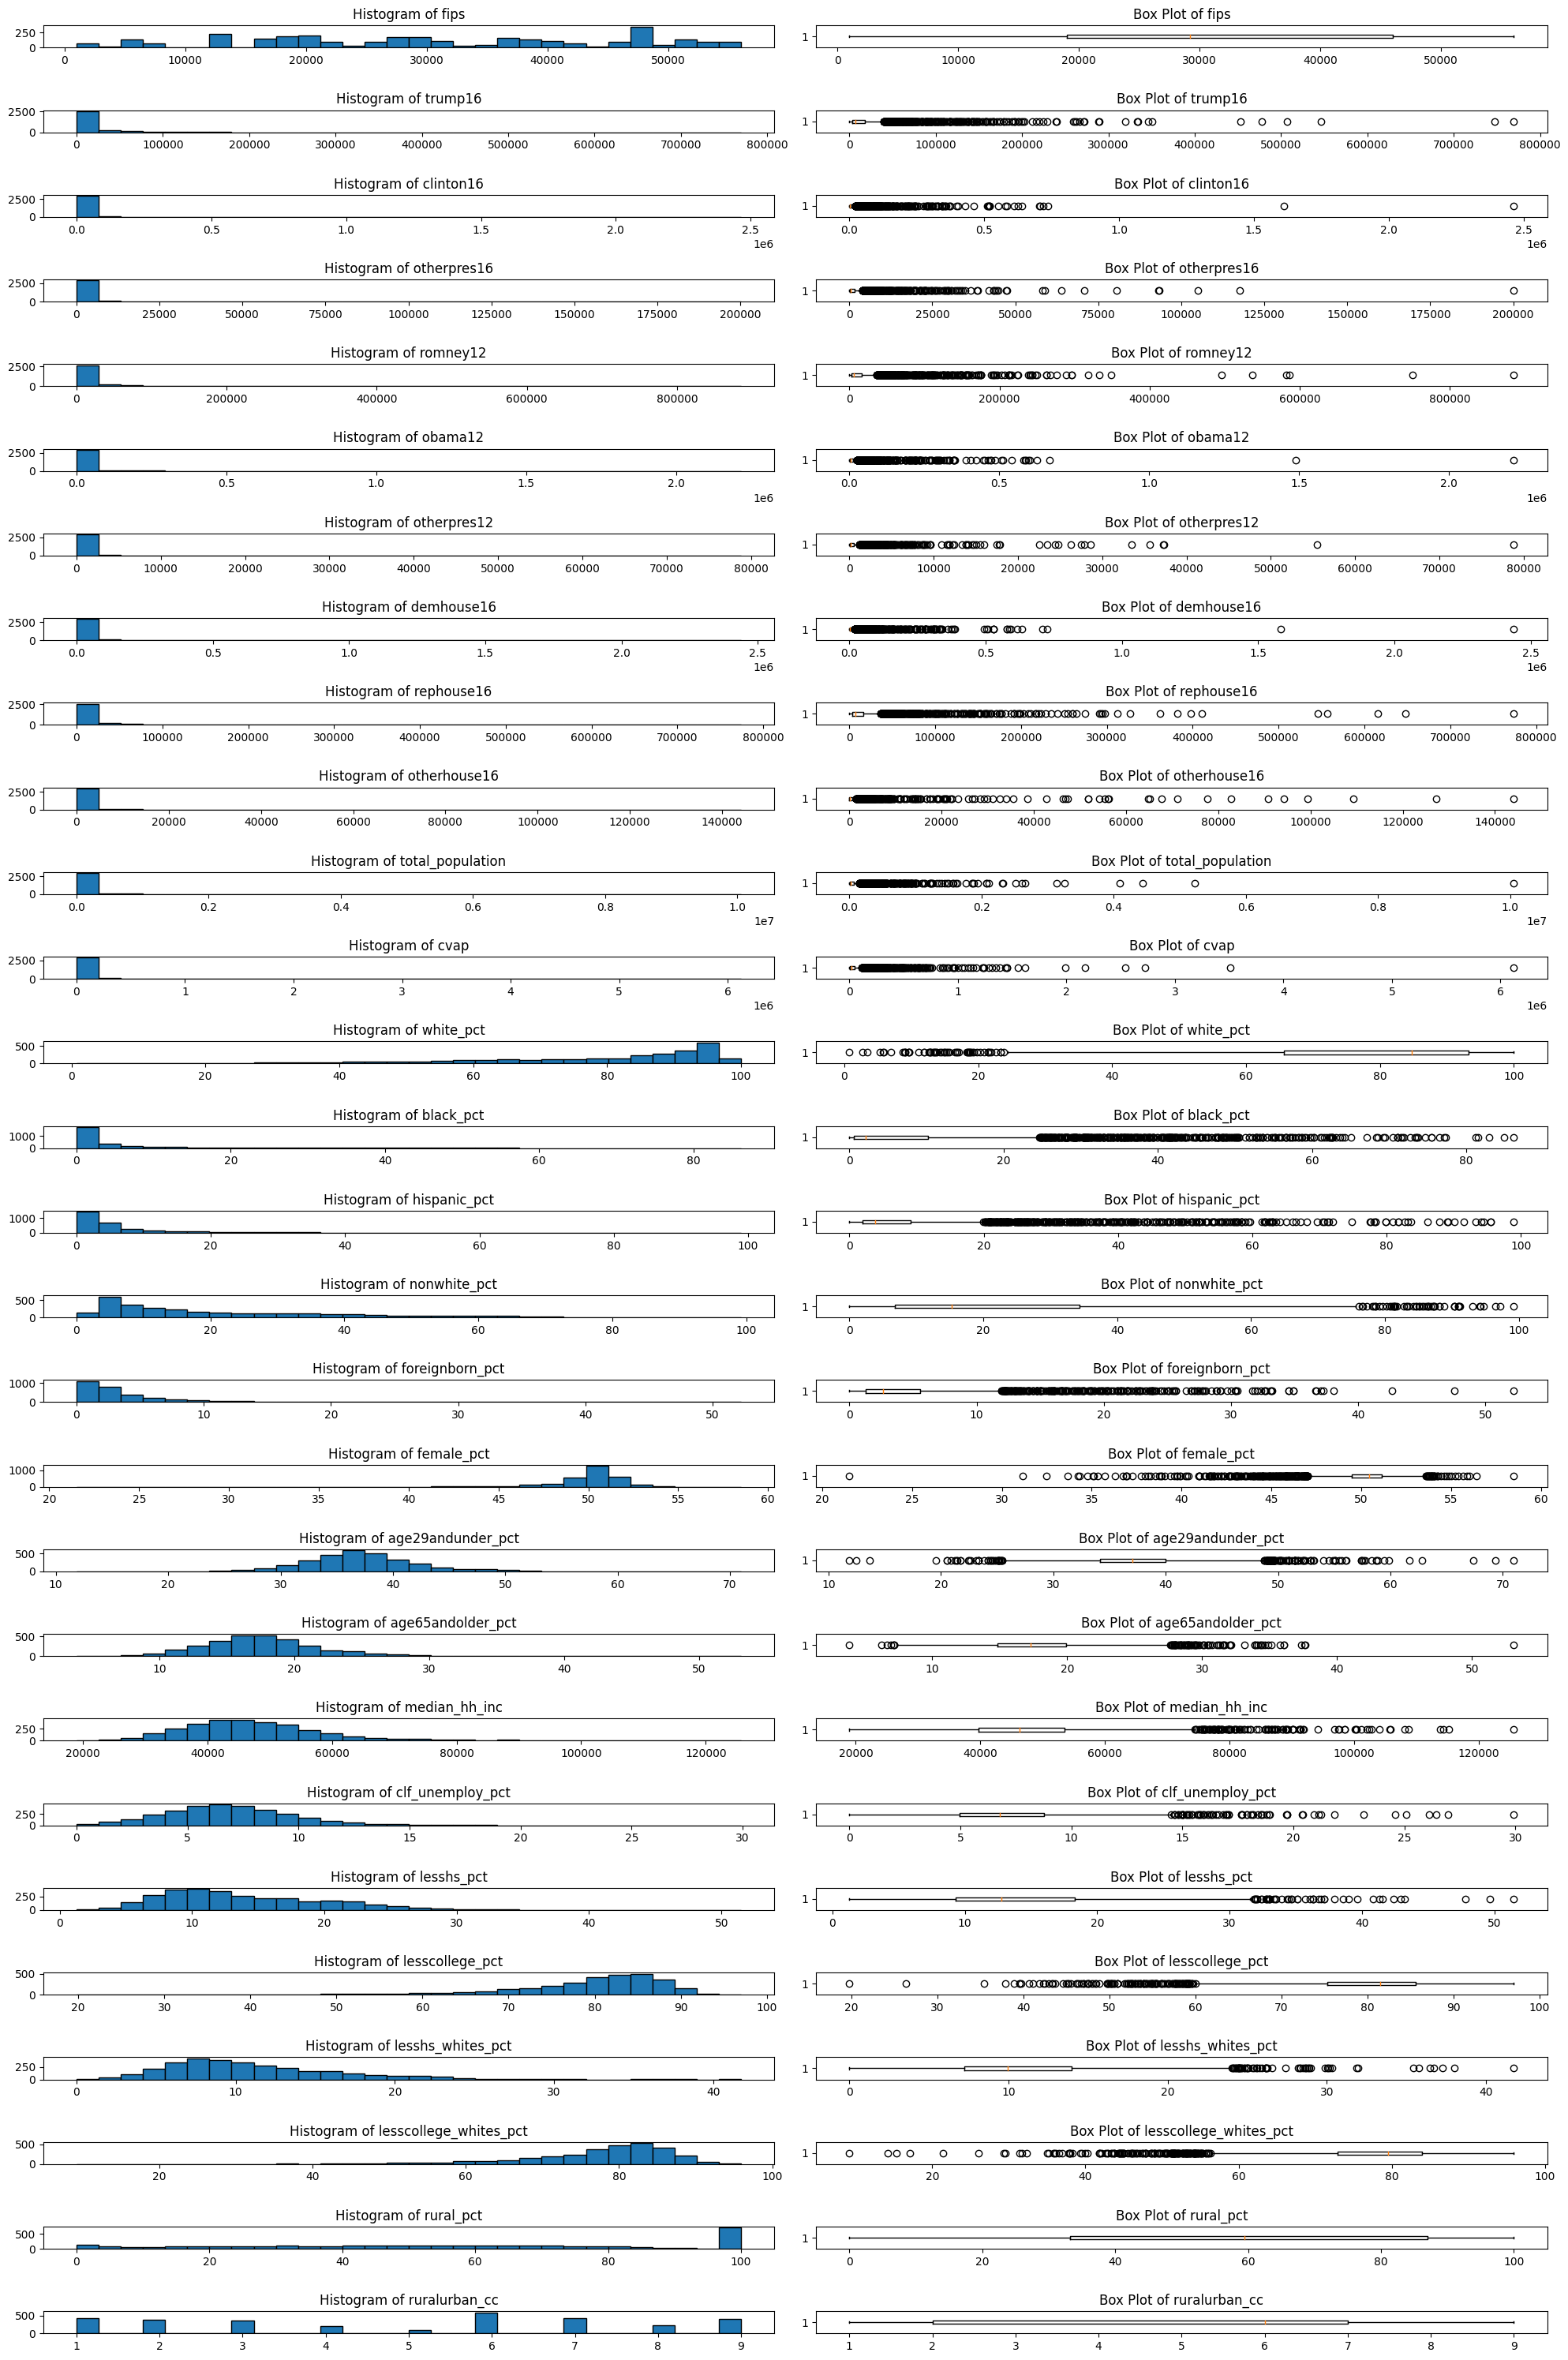

fips        trump16     clinton16    otherpres16  \
count   3114.000000    3114.000000  3.114000e+03    3114.000000   
mean   30660.117855   20171.786448  2.110600e+04    2459.164419   
std    14984.811176   43162.140286  8.052001e+04    7514.783991   
min     1001.000000       0.000000  0.000000e+00       0.000000   
25%    19039.500000    3216.250000  1.170000e+03     183.000000   
50%    29210.000000    7239.500000  3.178000e+03     499.000000   
75%    46006.500000   17886.000000  9.827750e+03    1674.000000   
max    56045.000000  769743.000000  2.464364e+06  200201.000000   

            romney12       obama12   otherpres12    demhouse16     rephouse16  \
count    3114.000000  3.114000e+03   3114.000000  3.114000e+03    3114.000000   
mean    19433.805716  2.106226e+04    839.764611  1.942055e+04   20164.181118   
std     44577.392198  7.401418e+04   2949.902265  7.746032e+04   44097.428792   
min        54.000000  5.000000e+00      0.000000  0.000000e+00       0.000000   
25%      2909.000000  1.553000e+03     74.000000  7.892500e+02    3387.250000   
50%      6445.500000  3.999000e+03    179.000000  2.790500e+03    7271.500000   
75%     16315.250000  1.134850e+04    529.750000  8.615500e+03   16666.500000   
max    885333.000000  2.216903e+06  78831.000000  2.438810e+06  774172.000000   

        otherhouse16  ...  age29andunder_pct  age65andolder_pct  \
count    3114.000000  ...        3114.000000        3114.000000   
mean     1481.389210  ...          37.342017          17.634027   
std      7088.590843  ...           5.437118           4.439952   
min         0.000000  ...          11.842105           3.854570   
25%         0.000000  ...          34.173636          14.834522   
50%        87.000000  ...          37.000969          17.280145   
75%       592.000000  ...          39.980390          19.932037   
max    144108.000000  ...          70.981316          53.106375   

       median_hh_inc  clf_unemploy_pct   lesshs_pct  lesscollege_pct  \
count    3114.000000       3114.000000  3114.000000      3114.000000   
mean    47816.128131          7.063805    14.224199        79.218653   
std     12476.444698          3.227299     6.540416         9.134634   
min     18972.000000          0.000000     1.278772        19.789880   
25%     39693.500000          4.959633     9.308632        75.335805   
50%     46250.000000          6.761641    12.773185        81.474694   
75%     53548.000000          8.774798    18.302951        85.564768   
max    125672.000000         29.927415    51.479358        97.014925   

       lesshs_whites_pct  lesscollege_whites_pct    rural_pct  ruralurban_cc  
count        3114.000000             3114.000000  3114.000000    3114.000000  
mean           11.043423               77.003384    58.470671       4.984586  
std             5.325321               10.354206    31.454410       2.701992  
min             0.000000                9.188199     0.000000       1.000000  
25%             7.233746               72.903353    33.215524       2.000000  
50%             9.938900               79.452055    59.412038       6.000000  
75%            13.944038               83.913772    86.972185       7.000000  
max            41.758287               95.918367   100.000000       9.000000  

[8 rows x 28 columns]

In [ ]:
summary_statistics = df_cleaned.describe()

# Visualizations
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Histograms and Box Plots
plt.figure(figsize=(20, 30))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, i*2-1)
    plt.hist(df_cleaned[column].dropna(), bins=30, edgecolor='k')
    plt.title(f'Histogram of {column}')

    plt.subplot(len(numeric_columns), 2, i*2)
    plt.boxplot(df_cleaned[column].dropna(), vert=False)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

summary_statistics

The scatter plot compares the white population percentage to the inferred white votes percentage for each county. The red dashed line represents an equal representation line where the percentage of white voters matches the percentage of the white population.

Points above the line indicate counties where the white voter percentage exceeds their demographic percentage, suggesting that white people are voting beyond their demographic representation in those counties.

# Research Question 1

In [ ]:

# Create a new column 'voting_preference'
df_cleaned['voting_preference_age'] = np.where(df_cleaned['clinton16'] > df_cleaned['trump16'], 'Democrat', 'Republican')

# Group by 'voting_preference' and calculate the mean values of 'age29andunder_pct' and 'age65andolder_pct'
age_pref = df_cleaned.groupby('voting_preference_age')[['age29andunder_pct', 'age65andolder_pct']].mean()

# Display the resulting summary DataFrame
age_pref


age29andunder_pct  age65andolder_pct
voting_preference_age                                      
Democrat                       40.268219          14.812041
Republican                     36.795585          18.160998

In [ ]:

# Create a new column 'education_preference'
df_cleaned['education_preference'] = np.where(df_cleaned['clinton16'] > df_cleaned['trump16'],  'Democrat', 'Republican')

# Group by 'education_preference' and calculate the mean values of 'clinton16' and 'trump16'
education_pref = df_cleaned.groupby('education_preference')[['lesshs_pct', 'lesscollege_pct']].mean()

# Display the resulting summary DataFrame
education_pref


lesshs_pct  lesscollege_pct
education_preference                             
Democrat               14.566899        70.788500
Republican             14.160204        80.792882

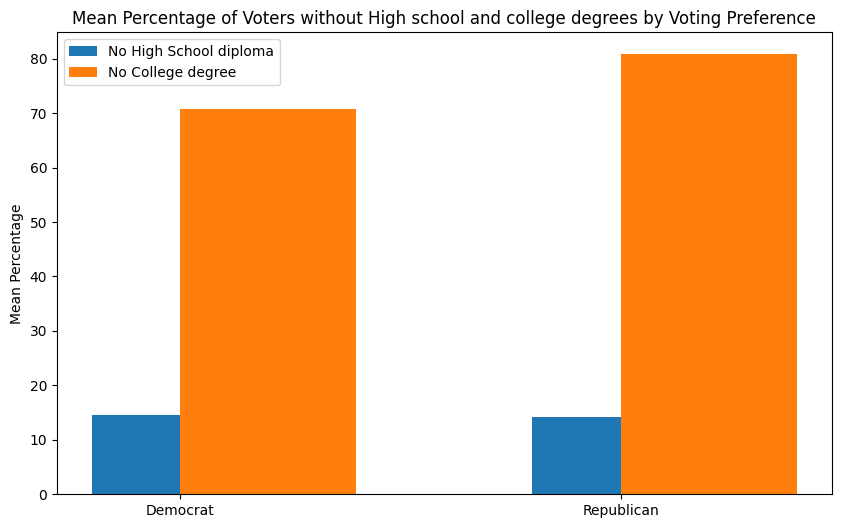

In [ ]:
# Create a bar chart to visualize the mean percentages of younger and older voters for Democrat and Republican voting preferences
fig, ax = plt.subplots(figsize=(10, 6))

# Data for the bar chart
labels = ['Democrat', 'Republican']
No_HighSchool = education_pref['lesshs_pct']
No_College = education_pref['lesscollege_pct']

# Create bar positions
x = range(len(labels))

# Plot the bars
ax.bar(x, No_HighSchool, width=0.4, label='No High School diploma', align='center')
ax.bar(x, No_College, width=0.4, label='No College degree', align='edge')

# Add labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Mean Percentage')
ax.set_title('Mean Percentage of Voters without High school and college degrees by Voting Preference')
ax.legend()

# Display the bar chart
plt.show()

In [ ]:


# Extract relevant data
trump_no_hs = df_cleaned[df_cleaned['education_preference'] == 'Republican']['lesshs_pct']
clinton_no_hs = df_cleaned[df_cleaned['education_preference'] == 'Democrat']['lesshs_pct']

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(trump_no_hs, clinton_no_hs)

# Set significance level
alpha = 0.05
print(p_value)
# Compare p-value to alpha
if p_value < alpha:
  print("Reject null hypothesis: Mean percentage of voters without a high school diploma voting for Trump is significantly different from the mean percentage of voters without a high school diploma voting for Clinton.")
else:
  print("Fail to reject null hypothesis: There is not enough evidence to conclude that the mean percentage of voters without a high school diploma voting for Trump is significantly different from the mean percentage of voters without a high school diploma voting for Clinton.")


0.20645176334351836
Fail to reject null hypothesis: There is not enough evidence to conclude that the mean percentage of voters without a high school diploma voting for Trump is significantly different from the mean percentage of voters without a high school diploma voting for Clinton.


In [ ]:


# Extract relevant data
trump_no_college = df_cleaned[df_cleaned['education_preference'] == 'Republican']['lesscollege_pct']
clinton_no_college = df_cleaned[df_cleaned['education_preference'] == 'Democrat']['lesscollege_pct']

# Perform the independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(trump_no_college, clinton_no_college)

# Set the significance level (alpha)
alpha = 0.05
print(p_value)

# Compare the p-value with the significance level
if p_value < alpha:
  print("Reject the null hypothesis:")
  print("- There is significant evidence that the mean percentage of voters without a college degree who voted for Trump is greater than the mean percentage of voters without a college degree who voted for Clinton.")
else:
  print("Fail to reject the null hypothesis:")
  print("- There is not enough evidence to conclude that the mean percentage of voters without a college degree who voted for Trump is greater than the mean percentage of voters without a college degree who voted for Clinton.")


2.8767303090407405e-119
Reject the null hypothesis:
- There is significant evidence that the mean percentage of voters without a college degree who voted for Trump is greater than the mean percentage of voters without a college degree who voted for Clinton.


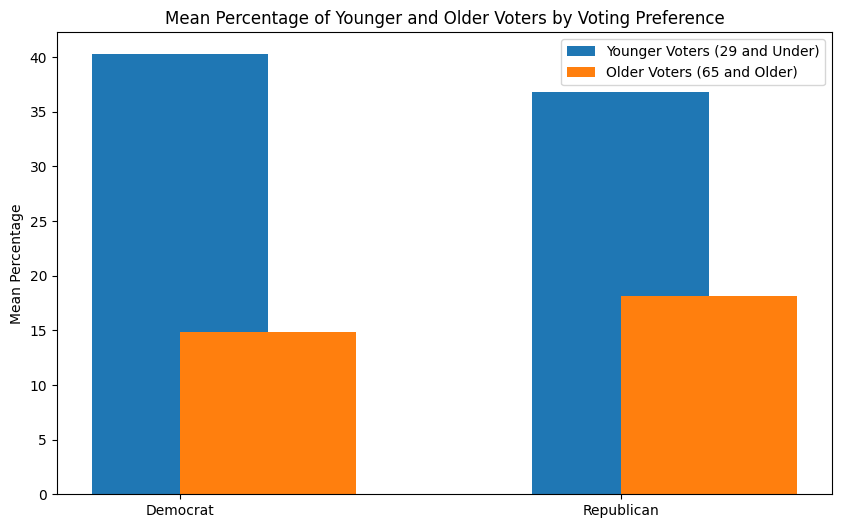

In [ ]:

# Create a bar chart to visualize the mean percentages of younger and older voters for Democrat and Republican voting preferences
fig, ax = plt.subplots(figsize=(10, 6))

# Data for the bar chart
labels = ['Democrat', 'Republican']
younger_voters = age_pref['age29andunder_pct']
older_voters = age_pref['age65andolder_pct']

# Create bar positions
x = range(len(labels))

# Plot the bars
ax.bar(x, younger_voters, width=0.4, label='Younger Voters (29 and Under)', align='center')
ax.bar(x, older_voters, width=0.4, label='Older Voters (65 and Older)', align='edge')

# Add labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Mean Percentage')
ax.set_title('Mean Percentage of Younger and Older Voters by Voting Preference')
ax.legend()

# Display the bar chart
plt.show()


In [ ]:

# Extract relevant data
trump_young = df_cleaned[df_cleaned['voting_preference_age'] == 'Republican']['age29andunder_pct']
clinton_young = df_cleaned[df_cleaned['voting_preference_age'] == 'Democrat']['age29andunder_pct']

# Perform the independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(trump_young, clinton_young)

# Set the significance level (alpha)
alpha = 0.05
print(p_value)

# Compare the p-value with the significance level
if p_value < alpha:
  print("Reject the null hypothesis:")
  print("- There is significant evidence that the mean percentage of young voters (29 and under) who voted for Clinton is greater than the mean percentage of young voters (29 and under) who voted for Trump.")
else:
  print("Fail to reject the null hypothesis:")
  print("- There is not enough evidence to conclude that the mean percentage of young voters (29 and under) who voted for Clinton is greater than the mean percentage of young voters (29 and under) who voted for Trump.")


1.575690217173379e-39
Reject the null hypothesis:
- There is significant evidence that the mean percentage of young voters (29 and under) who voted for Clinton is greater than the mean percentage of young voters (29 and under) who voted for Trump.


In [ ]:

# Extract relevant data
trump_old = df_cleaned[df_cleaned['voting_preference_age'] == 'Republican']['age65andolder_pct']
clinton_old = df_cleaned[df_cleaned['voting_preference_age'] == 'Democrat']['age65andolder_pct']

# Perform the independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(trump_old, clinton_old)

# Set the significance level (alpha)
alpha = 0.05
print(p_value)

# Compare the p-value with the significance level
if p_value < alpha:
  print("Reject the null hypothesis:")
  print("- There is significant evidence that the mean percentage of older voters (65 and older) who voted for Clinton is greater than the mean percentage of older voters (65 and older) who voted for Trump.")
else:
  print("Fail to reject the null hypothesis:")
  print("- There is not enough evidence to conclude that the mean percentage of older voters (65 and older) who voted for Clinton is greater than the mean percentage of older voters (65 and older) who voted for Trump.")


4.945567099676543e-55
Reject the null hypothesis:
- There is significant evidence that the mean percentage of older voters (65 and older) who voted for Clinton is greater than the mean percentage of older voters (65 and older) who voted for Trump.


# Research Question 2

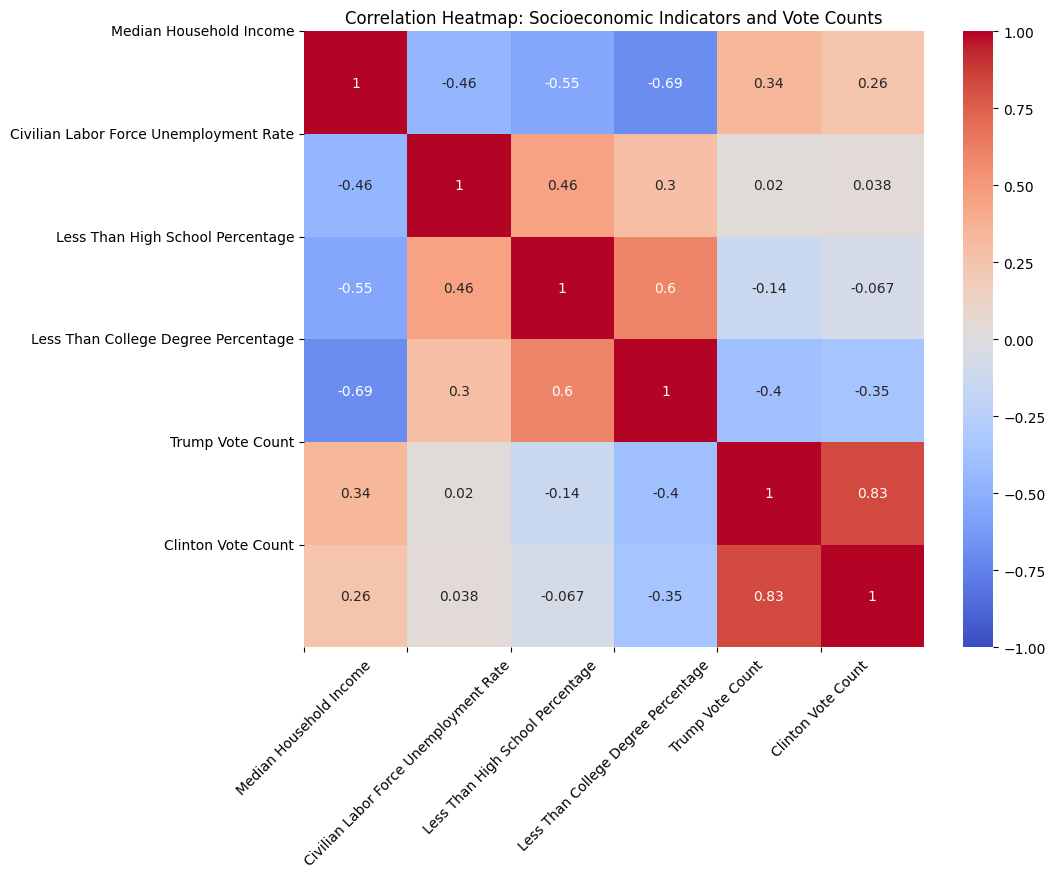

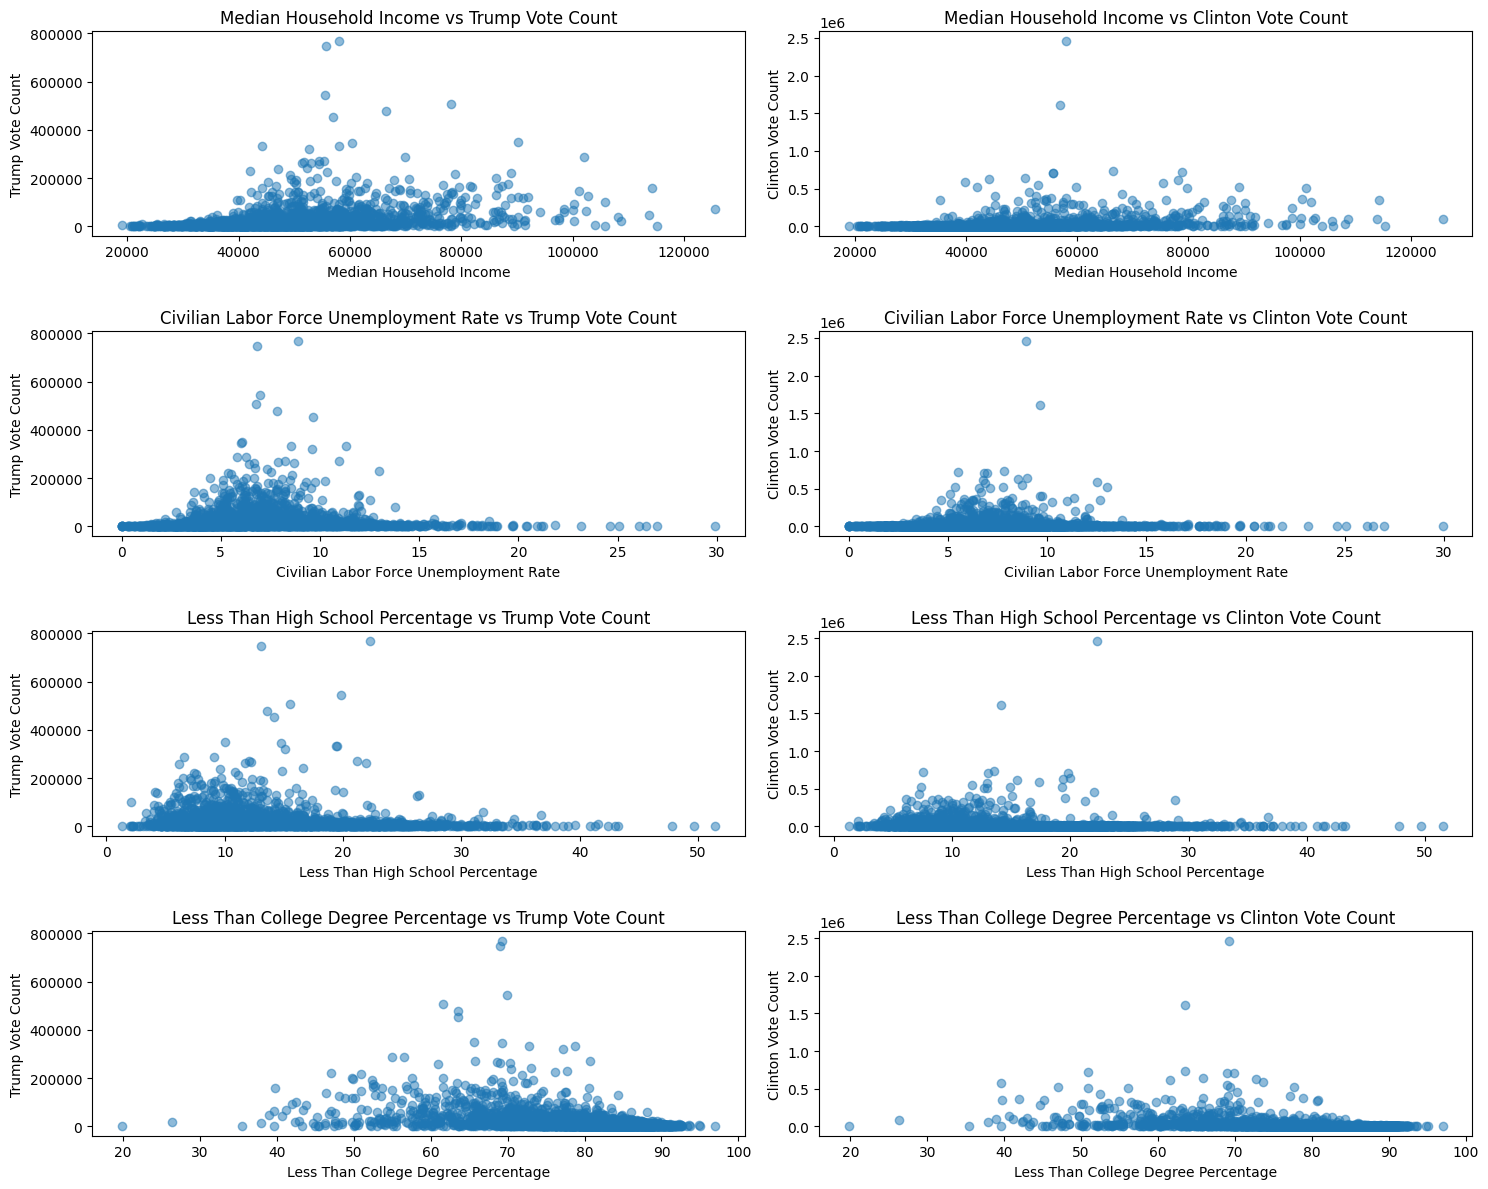

In [ ]:


# Select relevant columns
socioeconomic_indicators = ['median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct']
vote_counts = ['trump16', 'clinton16']

# Dictionary to map variable names to regular word labels
variable_labels = {
    'median_hh_inc': 'Median Household Income',
    'clf_unemploy_pct': 'Civilian Labor Force Unemployment Rate',
    'lesshs_pct': 'Less Than High School Percentage',
    'lesscollege_pct': 'Less Than College Degree Percentage',
    'trump16': 'Trump Vote Count',
    'clinton16': 'Clinton Vote Count'
}

# Calculate correlation matrix
correlation_matrix = df_cleaned[socioeconomic_indicators + vote_counts].corr()

# Visualize the correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Socioeconomic Indicators and Vote Counts')



# Create a custom list of tick labels for the x-axis (replace with your labels)
custom_xtick_labels = ['Median Household Income','Civilian Labor Force Unemployment Rate', 'Less Than High School Percentage', 'Less Than College Degree Percentage', 'Trump Vote Count', 'Clinton Vote Count']

# Create a custom list of tick labels for the y-axis (replace with your labels)
custom_ytick_labels = ['Median Household Income','Civilian Labor Force Unemployment Rate', 'Less Than High School Percentage', 'Less Than College Degree Percentage', 'Trump Vote Count', 'Clinton Vote Count']

# Set the custom tick labels for the heatmap
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=custom_xtick_labels, rotation=45)
plt.yticks(ticks=range(len(correlation_matrix.index)), labels=custom_ytick_labels)
plt.show()

# Visualize correlations using scatter plots
fig, axes = plt.subplots(len(socioeconomic_indicators), len(vote_counts), figsize=(15, 12))

for i, indicator in enumerate(socioeconomic_indicators):
    for j, vote_count in enumerate(vote_counts):
        axes[i, j].scatter(df_cleaned[indicator], df_cleaned[vote_count], alpha=0.5)
        axes[i, j].set_xlabel(variable_labels[indicator])
        axes[i, j].set_ylabel(variable_labels[vote_count])
        axes[i, j].set_title(f'{variable_labels[indicator]} vs {variable_labels[vote_count]}')

plt.tight_layout()
plt.show()

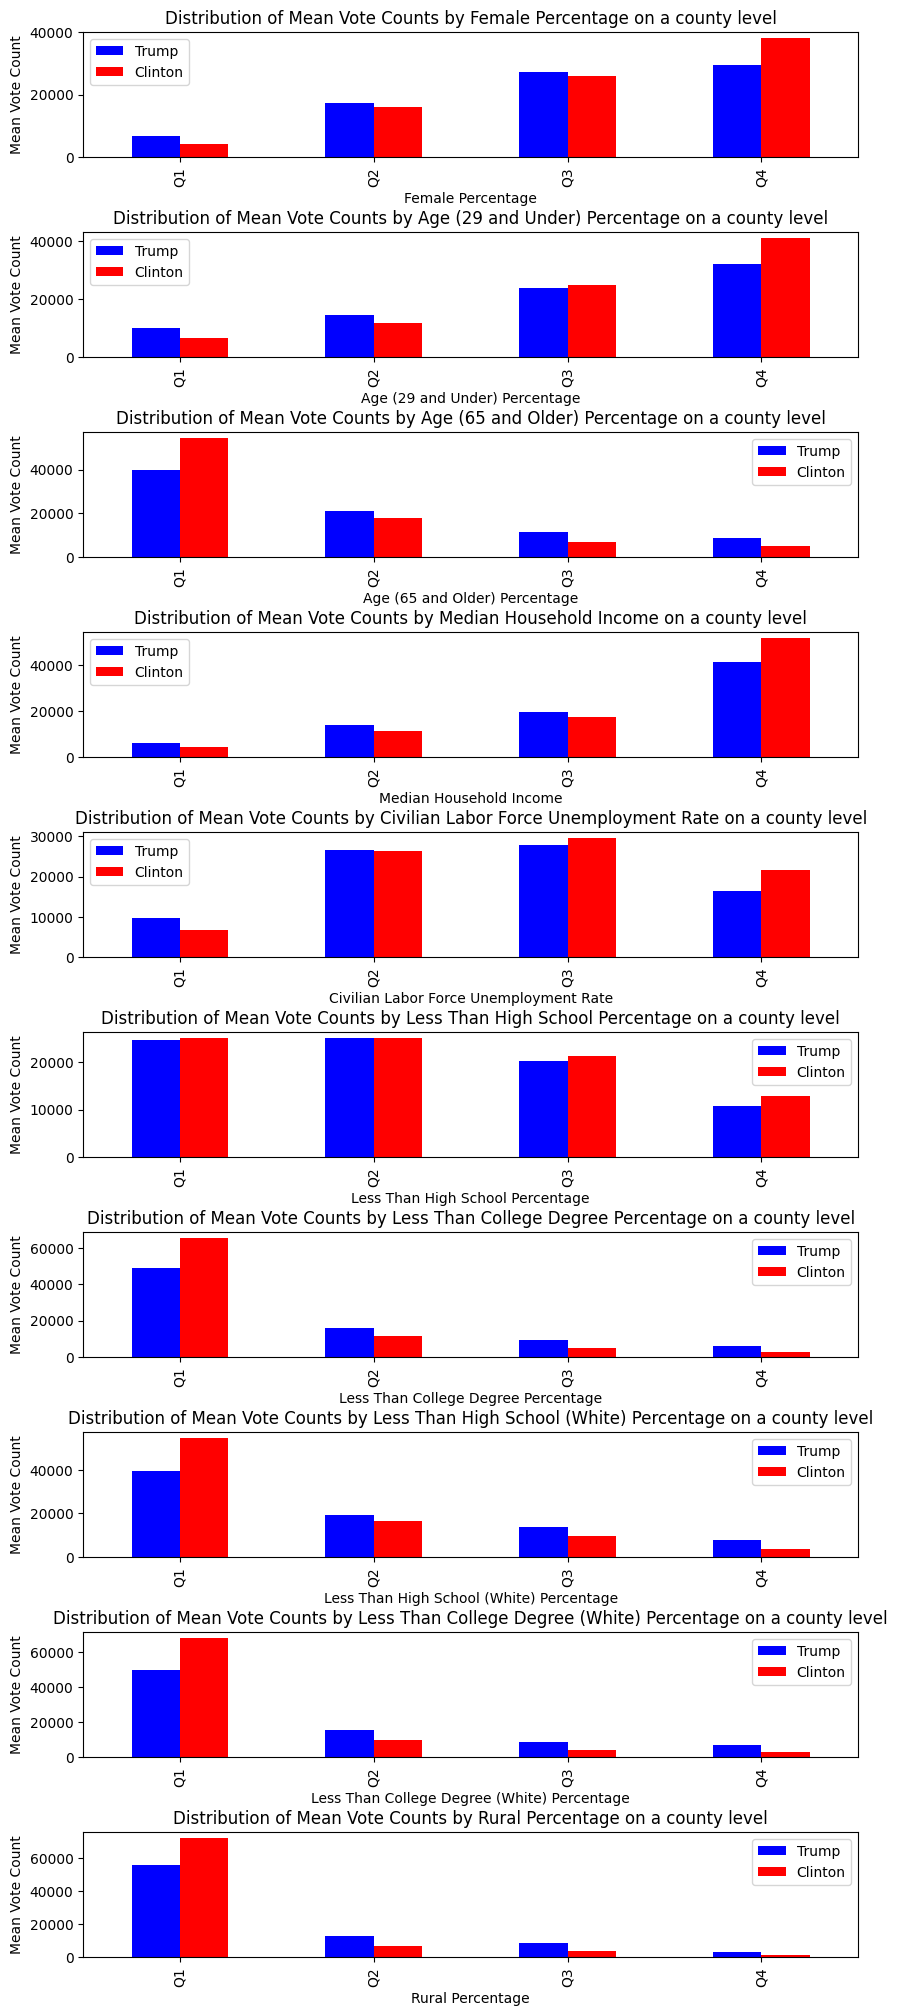

In [ ]:



# Function to create segmented bar charts for specified variables
def plot_segmented_bar_charts(data, variable, title, ax):
    # Create quartiles for the specified variable
    data[f'{variable}_quartile'] = pd.qcut(data[variable], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

    # Group by the quartiles and calculate mean vote counts
    education_segments = data.groupby(f'{variable}_quartile')[['trump16', 'clinton16']].mean().reset_index()

    # Plot segmented bar charts
    education_segments.plot(kind='bar', x=f'{variable}_quartile', ax=ax, title=title, color=['blue', 'red'])
    ax.set_ylabel('Mean Vote Count')
    ax.legend(['Trump', 'Clinton'])

# List of variables to plot
variables = ['female_pct', 'age29andunder_pct', 'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct', 'rural_pct']

# Define a dictionary to map variable names to human-readable labels
variable_labels = {
    # Calculate male percentage from female percentage
    'female_pct': 'Female Percentage',
    'age29andunder_pct': 'Age (29 and Under) Percentage',
    'age65andolder_pct': 'Age (65 and Older) Percentage',
    'median_hh_inc': 'Median Household Income',
    'clf_unemploy_pct': 'Civilian Labor Force Unemployment Rate',
    'lesshs_pct': 'Less Than High School Percentage',
    'lesscollege_pct': 'Less Than College Degree Percentage',
    'lesshs_whites_pct': 'Less Than High School (White) Percentage',
    'lesscollege_whites_pct': 'Less Than College Degree (White) Percentage',
    'rural_pct': 'Rural Percentage'
}
# # Create subplots
fig, axs = plt.subplots(len(variables), 1, figsize=(10, 25))
fig.subplots_adjust(wspace=0.3, hspace=0.6)

# Generate plots for each variable
for i, variable in enumerate(variables):
  title = f'Distribution of Mean Vote Counts by {variable_labels[variable]} on a county level'  # Use label from dictionary
  plot_segmented_bar_charts(df, variable, title, axs[i])
  axs[i].set_xlabel(variable_labels[variable])  # Set x-axis label using dictionary


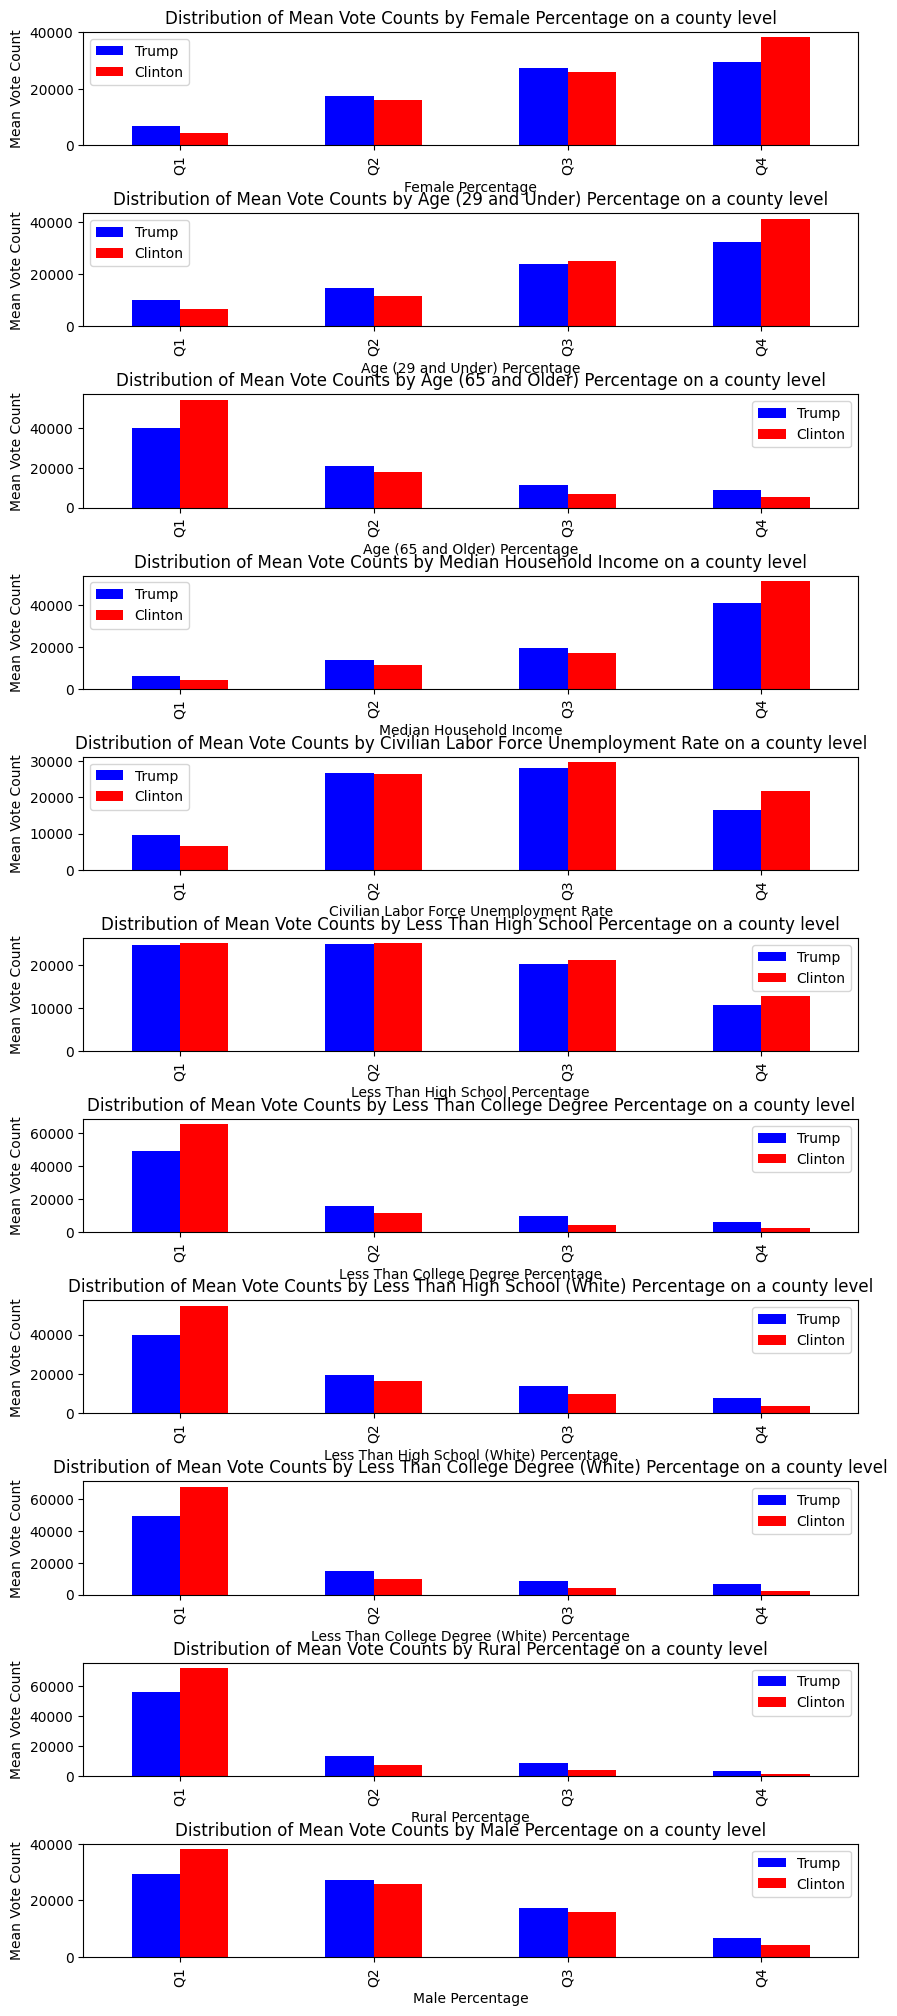

In [ ]:

# Calculate male percentages
df['male_pct'] = 100 - df['female_pct']

# Add male percentage to the list of variables to plot
variables.append('male_pct')

# Update the dictionary to include male percentage label
variable_labels['male_pct'] = 'Male Percentage'

# Create subplots
fig, axs = plt.subplots(len(variables), 1, figsize=(10, 25))
fig.subplots_adjust(wspace=0.3, hspace=0.6)

# Generate plots for each variable
for i, variable in enumerate(variables):
  title = f'Distribution of Mean Vote Counts by {variable_labels[variable]} on a county level'  # Use label from dictionary
  plot_segmented_bar_charts(df, variable, title, axs[i])
  axs[i].set_xlabel(variable_labels[variable])  # Set x-axis label using dictionary


# Research Question 3

In [ ]:
# Load US counties shapefile from a publicly available source
# Using a sample shapefile from a local or remote source (URL provided here is just an example)
url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
counties = gpd.read_file(url)

# Check the first few rows of the counties data
counties.head()


id          GEO_ID STATE COUNTY      NAME    LSAD  CENSUSAREA  \
0  01001  0500000US01001    01    001   Autauga  County     594.436   
1  01009  0500000US01009    01    009    Blount  County     644.776   
2  01017  0500000US01017    01    017  Chambers  County     596.531   
3  01021  0500000US01021    01    021   Chilton  County     692.854   
4  01033  0500000US01033    01    033   Colbert  County     592.619   

                                            geometry  
0  POLYGON ((-86.49677 32.34444, -86.71790 32.402...  
1  POLYGON ((-86.57780 33.76532, -86.75914 33.840...  
2  POLYGON ((-85.18413 32.87053, -85.12342 32.772...  
3  POLYGON ((-86.51734 33.02057, -86.51596 32.929...  
4  POLYGON ((-88.13999 34.58170, -88.13925 34.587...

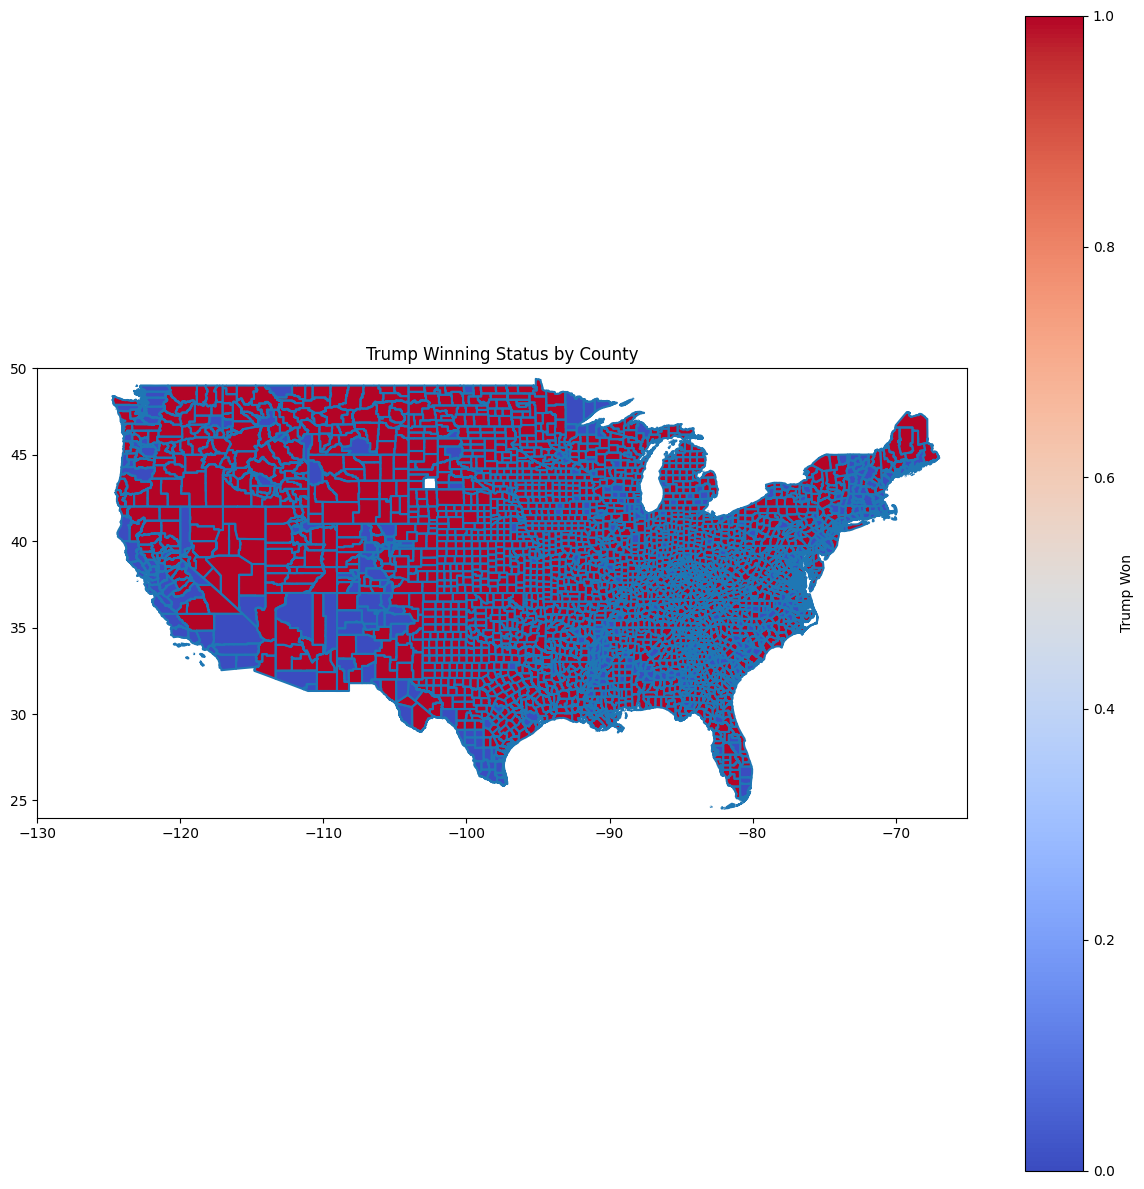

In [ ]:


df_cleaned['male_pct'] = 100 - df_cleaned['female_pct']


# Feature Engineering
df['trump_won'] = np.where(df['trump16'] > df['clinton16'], 1, 0)

# Convert FIPS codes to string and ensure 5-digit format
df['fips'] = df['fips'].astype(str).str.zfill(5)

# Load US counties shapefile
shapefile_path = "cb_2018_us_county_500k.zip"
counties = gpd.read_file(shapefile_path)

# Ensure GEOID is also 5-digit formatted
counties['GEOID'] = counties['GEOID'].astype(str).str.zfill(5)

# Merge the shapefile with the election dataset
merged = counties.merge(df, left_on='GEOID', right_on='fips')

# Plot the map using GeoPandas
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
counties.boundary.plot(ax=ax)
merged.plot(column='trump_won', ax=ax, legend=True, legend_kwds={'label': "Trump Won"}, cmap='coolwarm')

# Set plot limits to focus on continental US
ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)
plt.title('Trump Winning Status by County')
plt.show()


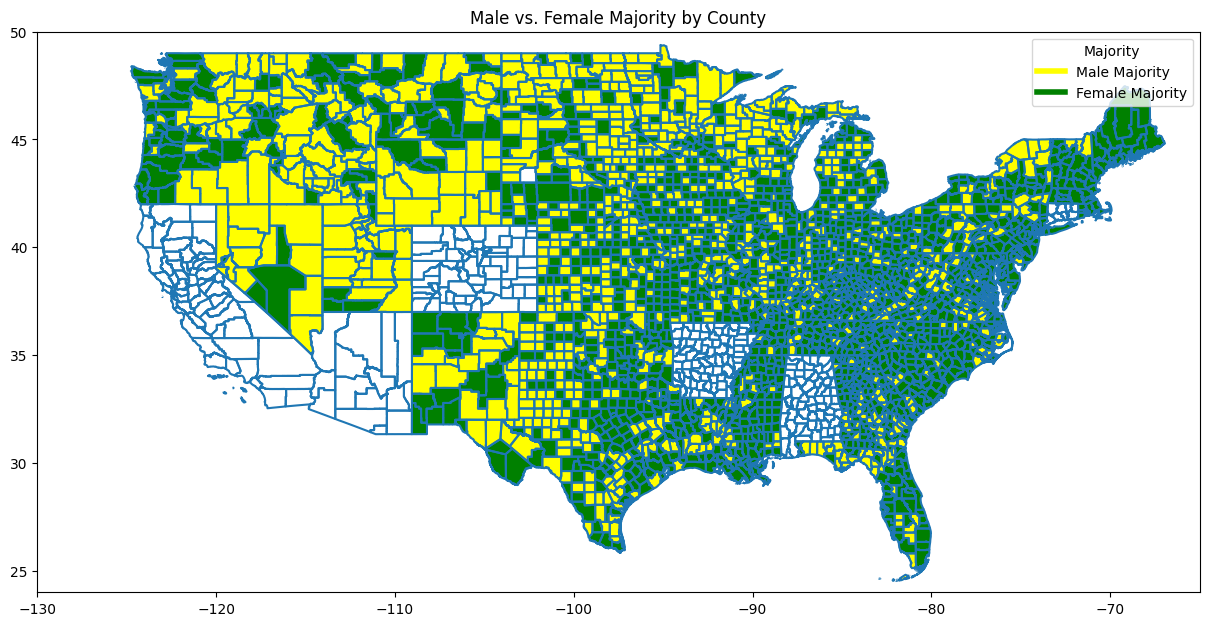

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_cleaned and shapefile_path are already defined
df_cleaned['fips'] = df_cleaned['fips'].astype(str)

# Load US counties shapefile
counties = gpd.read_file(shapefile_path)

# Ensure GEOID is also 5-digit formatted
counties['GEOID'] = counties['GEOID'].astype(str).str.zfill(5)

# Merge the shapefile with the election dataset
merged = counties.merge(df_cleaned, left_on='GEOID', right_on='fips')

# Create a new column to indicate male or female majority
merged['majority'] = np.where(merged['male_pct'] > 50, 'Male', 'Female')

# Define the colors for the majority
colors = {'Male': 'yellow', 'Female': 'green'}

# Create a map with male majority counties colored yellow and female majority counties colored green
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
counties.boundary.plot(ax=ax)
for key, value in colors.items():
    merged[merged['majority'] == key].plot(ax=ax, color=value, label=key)

# Set plot limits to focus on continental US
ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)
plt.title('Male vs. Female Majority by County')

# Add manual legend
legend_labels = [plt.Line2D([0], [0], color='yellow', lw=4, label='Male Majority'),
                 plt.Line2D([0], [0], color='green', lw=4, label='Female Majority')]
ax.legend(handles=legend_labels, title='Majority')

plt.show()


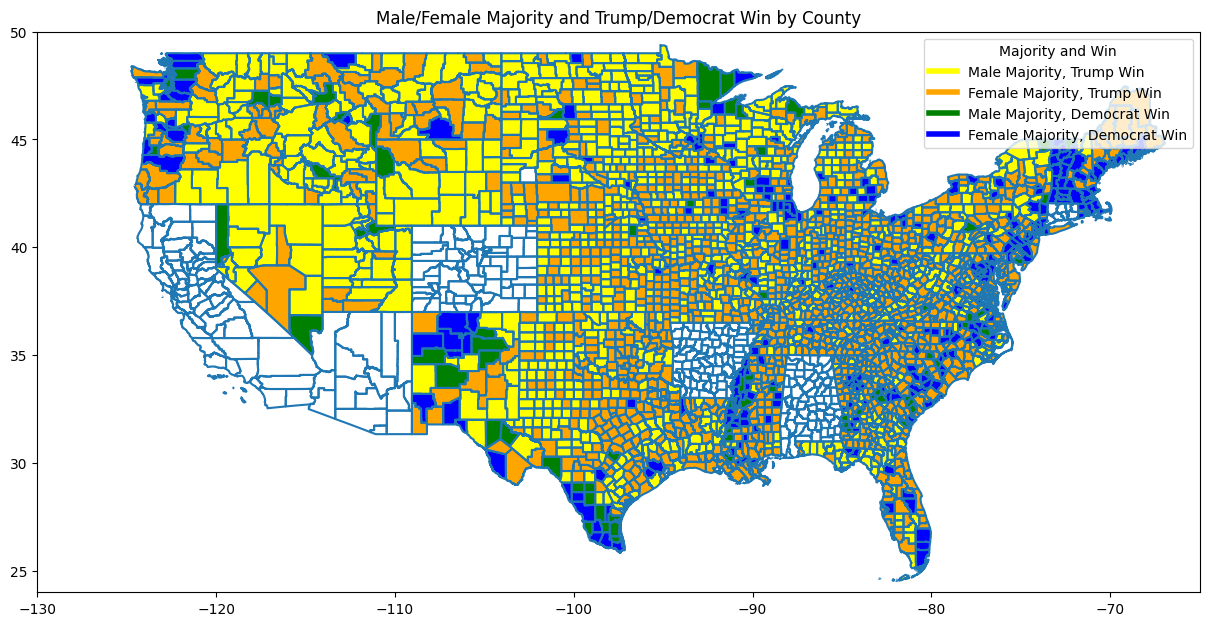

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_cleaned and shapefile_path are already defined
df_cleaned['fips'] = df_cleaned['fips'].astype(str)

# Load US counties shapefile
counties = gpd.read_file(shapefile_path)

# Ensure GEOID is also 5-digit formatted
counties['GEOID'] = counties['GEOID'].astype(str).str.zfill(5)

# Merge the shapefile with the election dataset
merged = counties.merge(df_cleaned, left_on='GEOID', right_on='fips')

# Create a new column to indicate whether Trump won
merged['trump_won'] = np.where(merged['trump16'] > merged['clinton16'], 'Trump', 'Democrat')

# Create new columns to indicate male/female majority and Trump/Democrat win
merged['category'] = np.where((merged['male_pct'] > 50) & (merged['trump_won'] == 'Trump'), 'male_trump',
                   np.where((merged['male_pct'] < 50) & (merged['trump_won'] == 'Trump'), 'female_trump',
                   np.where((merged['male_pct'] > 50) & (merged['trump_won'] == 'Democrat'), 'male_democrat',
                   'female_democrat')))

# Define the colors for the different categories
colors = {
    'male_trump': 'yellow',
    'female_trump': 'orange',
    'male_democrat': 'green',
    'female_democrat': 'blue',
}

# Create a map with the specified colors for each category
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
counties.boundary.plot(ax=ax)
for key, value in colors.items():
    merged[merged['category'] == key].plot(ax=ax, color=value, label=key)

# Set plot limits to focus on continental US
ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)
plt.title('Male/Female Majority and Trump/Democrat Win by County')

# Add manual legend
legend_labels = [
    plt.Line2D([0], [0], color='yellow', lw=4, label='Male Majority, Trump Win'),
    plt.Line2D([0], [0], color='orange', lw=4, label='Female Majority, Trump Win'),
    plt.Line2D([0], [0], color='green', lw=4, label='Male Majority, Democrat Win'),
    plt.Line2D([0], [0], color='blue', lw=4, label='Female Majority, Democrat Win')
]
ax.legend(handles=legend_labels, title='Majority and Win')

plt.show()


In [ ]:
# Identify counties where the majority population (male or female) does not align with the winning candidate
anomalies = pd.concat([merged[(merged['male_pct'] > 50) & (merged['trump_won'] == 'Democrat')],
                     merged[(merged['male_pct'] < 50) & (merged['trump_won'] == 'Trump')]])

# Print the names of the anomalous counties
print(anomalies['county'].tolist())


['Baldwin', 'Hancock', 'Liberty', 'Deer Lodge', 'Iberville', 'Anson', 'Sioux', 'Kenedy', 'Allendale', 'Salt Lake', 'Summit', 'Marquette', 'Issaquena', 'Wilkinson', 'Yazoo', 'Gallatin', 'Clark', 'East Carroll', 'Ashland', 'Lake', 'Adams', 'Travis', 'Snohomish', 'Centre', 'Marlboro', 'Culberson', 'Kleberg', 'Val Verde', 'Guadalupe', 'Mora', 'Washington', 'Bertie', 'Taliaferro', 'Lee', 'Greensville', 'Whitman', 'Teton', 'Saint Louis', 'Montgomery', 'Bayfield', 'Benton', 'Blaine', 'Washoe', 'Reeves', 'La Salle', 'Calhoun', 'Randolph', 'Honolulu', 'Story', 'Clinton', 'Willacy', 'Hood River', 'Zavala', 'Brunswick', 'Orleans', 'Duval', 'Manassas Park', 'Frio', 'Lancaster', 'Kitsap', 'San Miguel', 'Sunflower', 'Nantucket', 'Jasper', 'Stewart', 'Oktibbeha', 'Macon', 'Warren', 'Cibola', 'Iowa', 'Tallahatchie', 'Los Alamos', 'Columbia', 'Brooks', 'Socorro', 'Portage', 'Carlton', 'Jackson', 'Sussex', 'Zapata', 'Norfolk', 'Hampton', 'Lexington', 'Missoula', 'Cumberland', 'Latah', 'Ballard', 'Bourbo

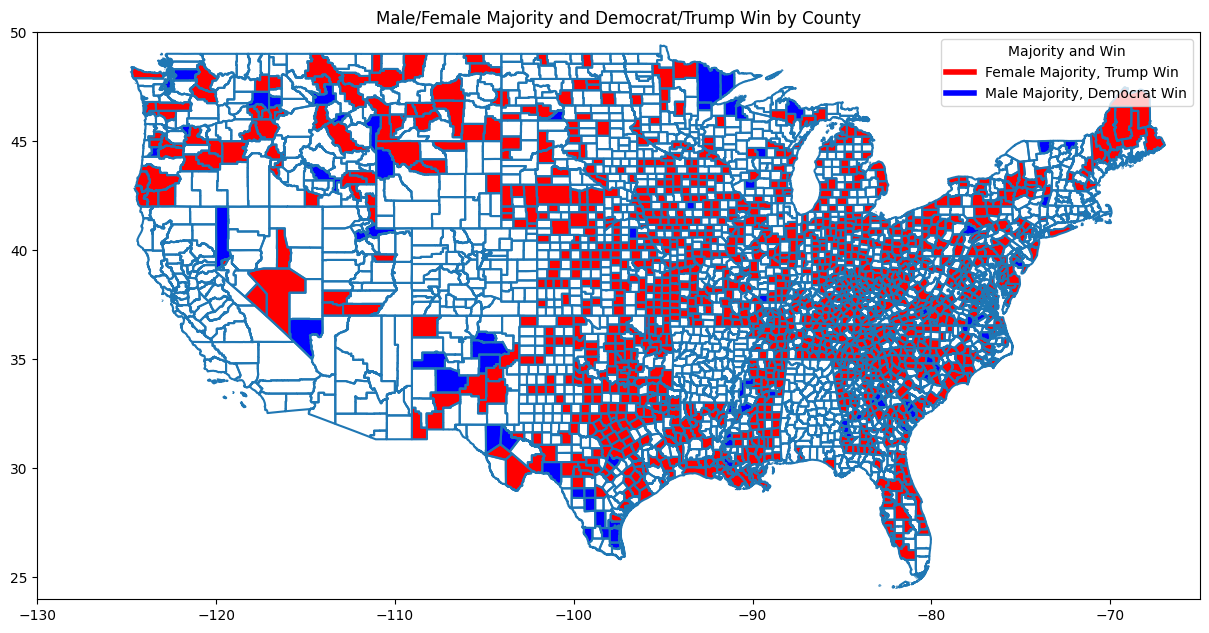

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_cleaned and shapefile_path are already defined
df_cleaned['fips'] = df_cleaned['fips'].astype(str)

# Load US counties shapefile
counties = gpd.read_file(shapefile_path)

# Ensure GEOID is also 5-digit formatted
counties['GEOID'] = counties['GEOID'].astype(str).str.zfill(5)

# Merge the shapefile with the election dataset
merged = counties.merge(df_cleaned, left_on='GEOID', right_on='fips')

# Create a new column to indicate whether Trump won
merged['trump_won'] = np.where(merged['trump16'] > merged['clinton16'], 'Trump', 'Democrat')

# Create new columns to indicate male/female majority and Trump/Democrat win
merged['category'] = np.where((merged['male_pct'] > 50) & (merged['trump_won'] == 'Trump'), 'male_trump',
                   np.where((merged['male_pct'] < 50) & (merged['trump_won'] == 'Trump'), 'female_trump',
                   np.where((merged['male_pct'] > 50) & (merged['trump_won'] == 'Democrat'), 'male_democrat',
                   'female_democrat')))

# Define the colors for the different categories
colors = {
    'female_trump': 'red',
    'male_democrat': 'blue',
}

# Create a map with the specified colors for each category
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
counties.boundary.plot(ax=ax)
for key, value in colors.items():
    merged[merged['category'] == key].plot(ax=ax, color=value, label=key)

# Highlight the anomalous counties

# Set plot limits to focus on continental US
ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)
plt.title('Male/Female Majority and Democrat/Trump Win by County')

# Add manual legend
legend_labels = [
    plt.Line2D([0], [0], color='red', lw=4, label='Female Majority, Trump Win'),
    plt.Line2D([0], [0], color='blue', lw=4, label='Male Majority, Democrat Win')
]
ax.legend(handles=legend_labels, title='Majority and Win')

plt.show()


In [ ]:


# Identify numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Transform each numeric column with Box-Cox transformation
for column in numeric_columns:
  transformed_column, lambda_value = stats.boxcox(df_cleaned[column] + 1)
  df_cleaned[column] = transformed_column

# Check the transformed data
df_cleaned.head()

state   county  fips    trump16  clinton16  otherpres16  romney12  \
0  Alabama  Autauga  1001   8.909253   7.514633     5.552340  7.173691   
1  Alabama  Baldwin  1003  10.036078   8.340680     6.504361  7.839191   
2  Alabama  Barbour  1005   7.907421   7.367351     4.298209  6.555588   
3  Alabama     Bibb  1007   8.085137   6.641750     4.562428  6.611481   
4  Alabama   Blount  1009   9.097561   6.749708     5.275618  7.265715   

    obama12  otherpres12  demhouse16  ...  clf_unemploy_pct  lesshs_pct  \
0  7.396843     5.812740   17.254215  ...          2.934326    3.077297   
1  8.131827     7.760425    0.000000  ...          3.168814    2.800889   
2  7.344866     4.170243   16.108768  ...          4.936400    4.108551   
3  6.631780     4.866975   13.180961  ...          3.442129    3.669248   
4  6.850746     6.283106   13.721655  ...          3.058133    3.716777   

   lesscollege_pct  lesshs_whites_pct  lesscollege_whites_pct  rural_pct  \
0     6.411766e+08           3.268287            5.036502e+07  26.007587   
1     4.570267e+08           2.884352            3.552475e+07  26.152676   
2     1.318542e+09           4.489987            7.613320e+07  38.953494   
3     1.385430e+09           3.978703            1.046862e+08  39.225537   
4     1.304851e+09           4.171972            9.796767e+07  49.405631   

   ruralurban_cc  voting_preference_age  education_preference  male_pct  
0       1.698762             Republican            Republican  0.129707  
1       2.424448             Republican            Republican  0.129707  
2       4.368732             Republican            Republican  0.129707  
3       0.906725             Republican            Republican  0.129707  
4       0.906725             Republican            Republican  0.129707  

[5 rows x 33 columns]

In [ ]:

def impute_outliers_with_boundaries(df):
  for column in df.select_dtypes(include=['float64', 'int64']):
    # Calculate the 95th percentile
    percentile_95 = df[column].quantile(0.95)
    # Calculate the 5th percentile
    percentile_5 = df[column].quantile(0.05)
    # Replace values above the 95th percentile with the 95th percentile
    df[column] = df[column].apply(lambda x: min(x, percentile_95))
    # Replace values below the 5th percentile with the 5th percentile
    df[column] = df[column].apply(lambda x: max(x, percentile_5))
  return df

df_imputed = impute_outliers_with_boundaries(df_cleaned.copy())


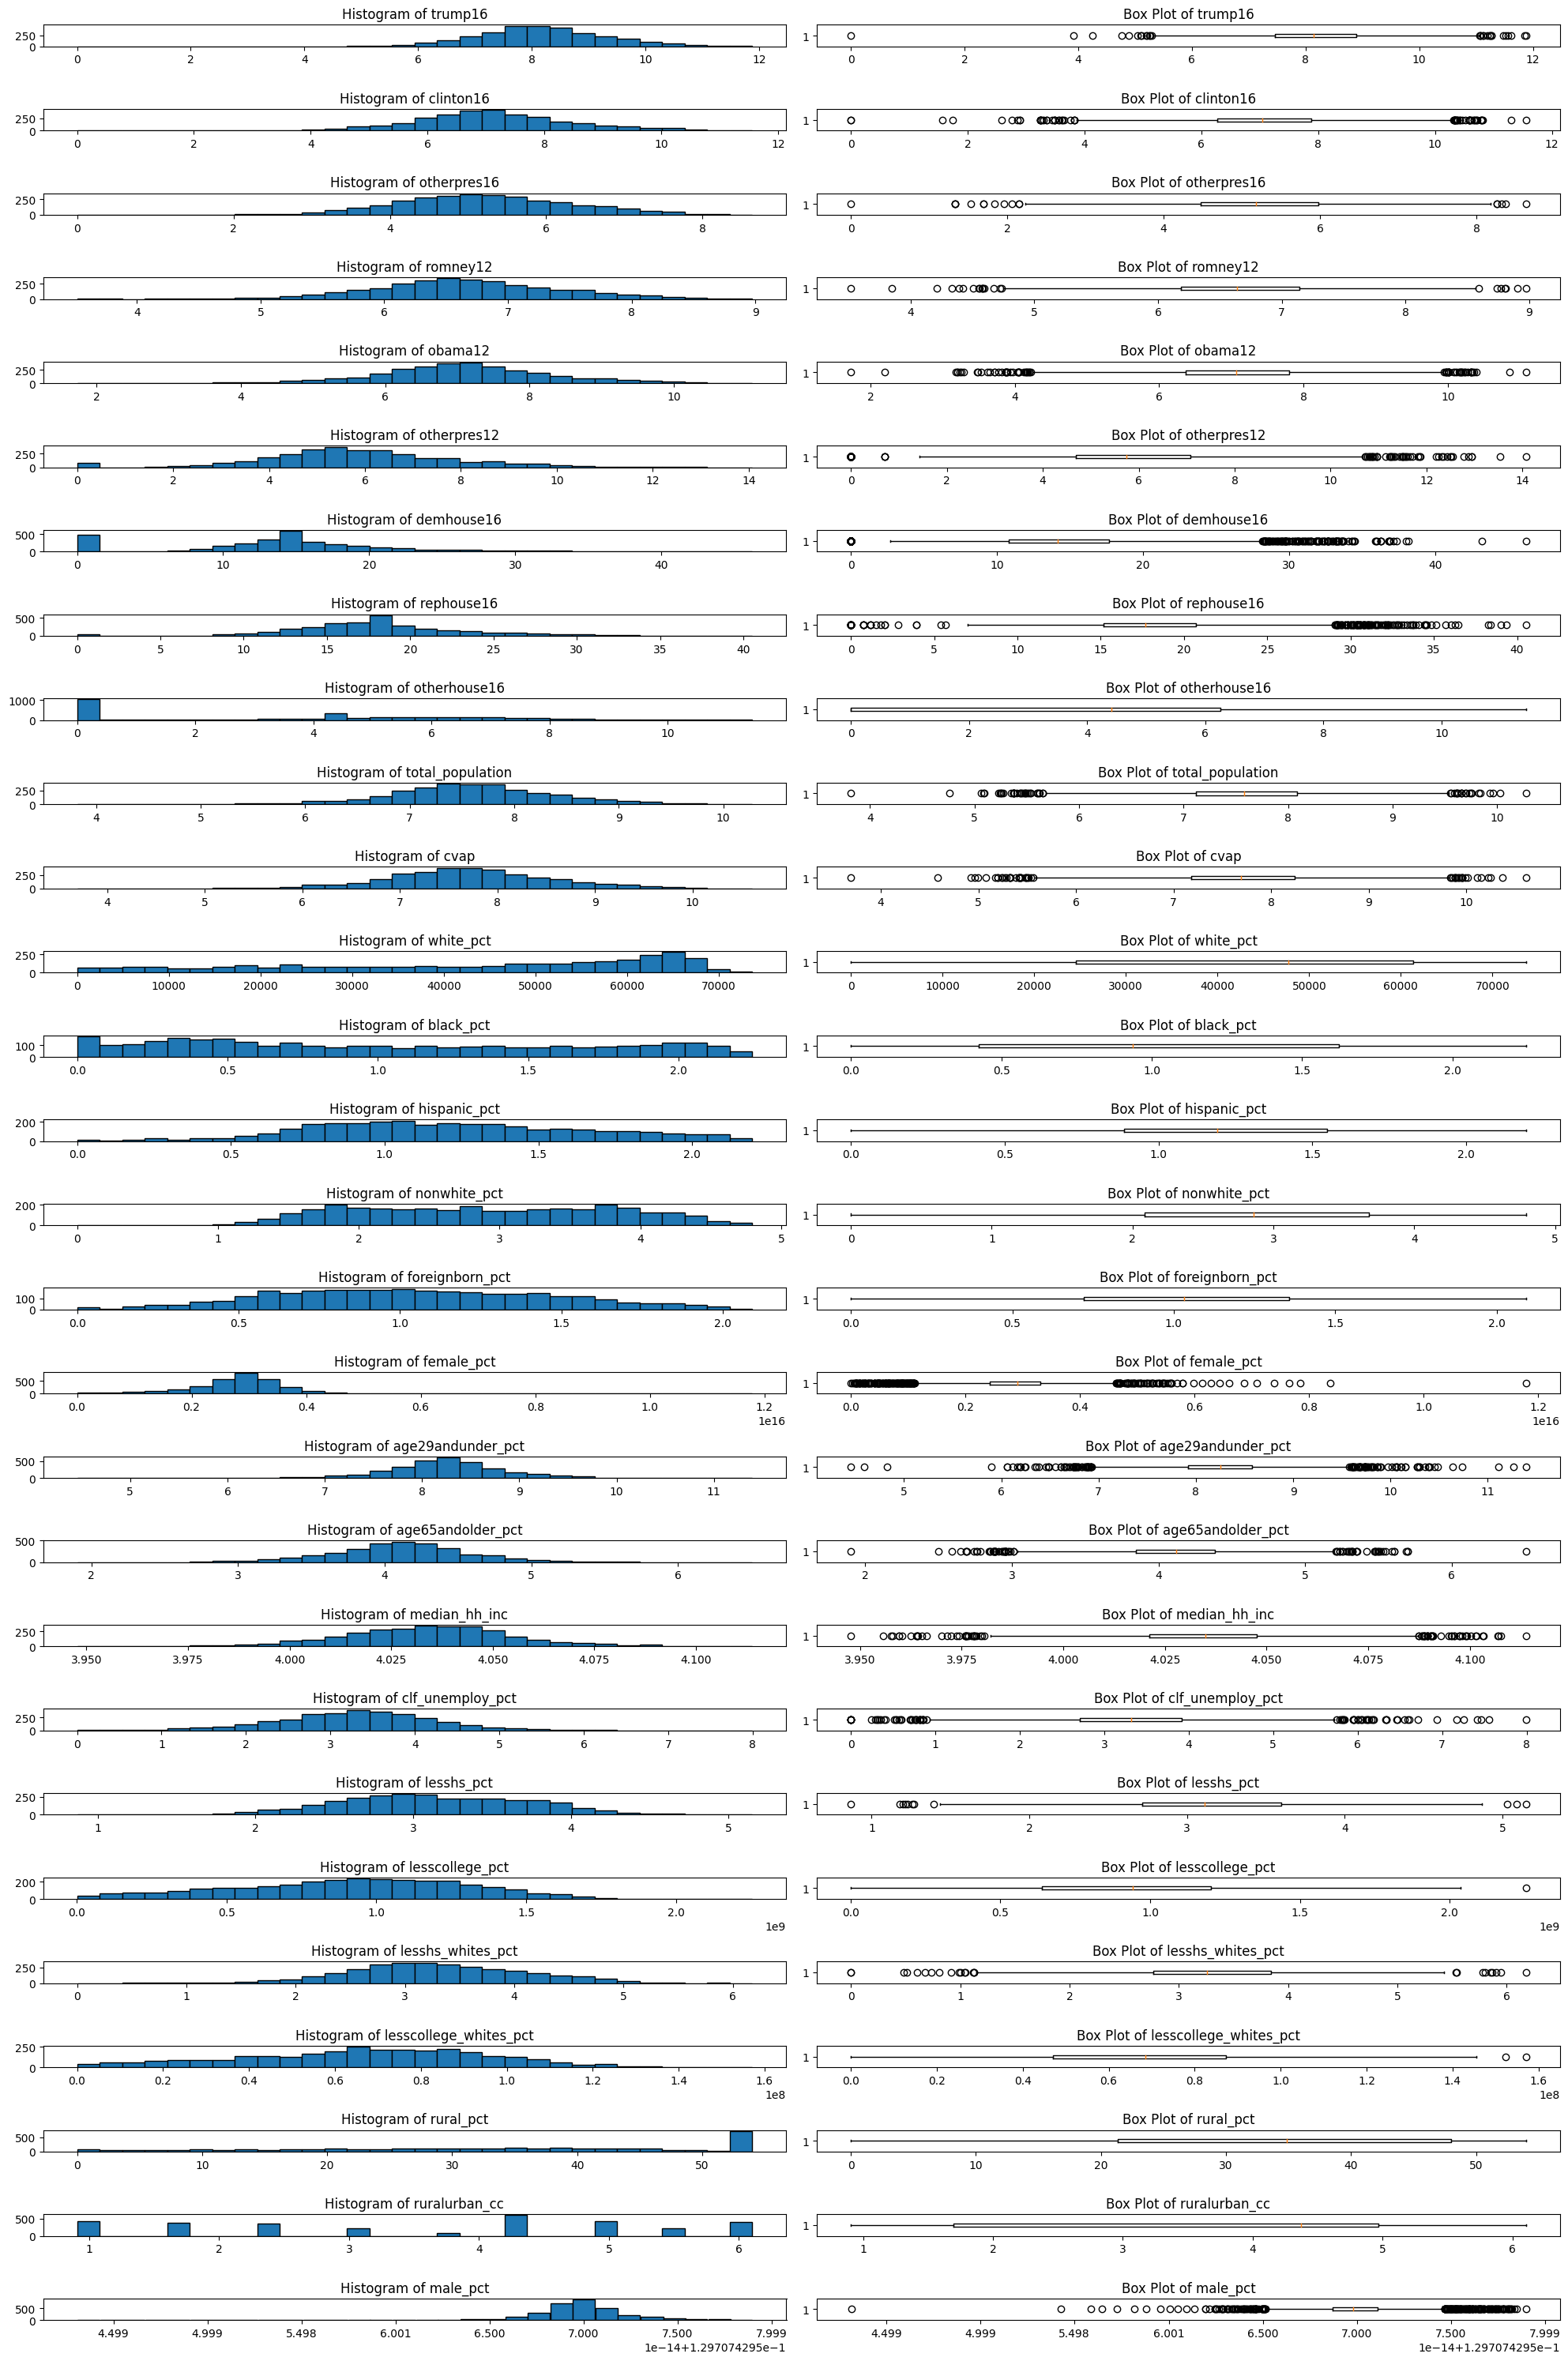

trump16    clinton16  otherpres16     romney12      obama12  \
count  3114.000000  3114.000000  3114.000000  3114.000000  3114.000000   
mean      8.188328     7.097450     5.223337     6.662448     7.098734   
std       1.128404     1.343939     1.111767     0.743669     1.192202   
min       0.000000     0.000000     0.000000     3.516164     1.729466   
25%       7.460221     6.275205     4.473291     6.184401     6.372962   
50%       8.145314     7.045865     5.181196     6.639289     7.065915   
75%       8.896203     7.885696     5.982107     7.140704     7.800672   
max      11.878525    11.558430     8.634975     8.975622    11.084359   

       otherpres12   demhouse16   rephouse16  otherhouse16  total_population  \
count  3114.000000  3114.000000  3114.000000   3114.000000       3114.000000   
mean      5.898501    13.758051    18.174588      3.762553          7.611570   
std       2.090932     7.756459     5.287241      3.085372          0.782328   
min       0.000000     0.000000     0.000000      0.000000          3.817573   
25%       4.691617    10.797067    15.145717      0.000000          7.116773   
50%       5.740411    14.166535    17.661255      4.412396          7.580738   
75%       7.084900    17.698686    20.715298      6.253662          8.087023   
max      14.073894    46.224834    40.537639     11.428501         10.276882   

       ...  age65andolder_pct  median_hh_inc  clf_unemploy_pct   lesshs_pct  \
count  ...        3114.000000    3114.000000       3114.000000  3114.000000   
mean   ...           4.115709       4.034456          3.305057     3.144303   
std    ...           0.459058       0.021727          0.993431     0.599769   
min    ...           1.901676       3.947728          0.000000     0.868381   
25%    ...           3.846302       4.021140          2.708770     2.716563   
50%    ...           4.120233       4.034872          3.321820     3.113822   
75%    ...           4.386951       4.047594          3.918254     3.595475   
max    ...           6.506815       4.113862          7.994152     5.150499   

       lesscollege_pct  lesshs_whites_pct  lesscollege_whites_pct  \
count     3.114000e+03        3114.000000            3.114000e+03   
mean      9.135190e+08           3.300869            6.667441e+07   
std       3.896341e+08           0.806157            2.864990e+07   
min       8.957003e+05           0.000000            6.919996e+03   
25%       6.381556e+08           2.763501            4.698444e+07   
50%       9.431406e+08           3.257897            6.857059e+07   
75%       1.204301e+09           3.842203            8.719936e+07   
max       2.255282e+09           6.176598            1.571166e+08   

         rural_pct  ruralurban_cc      male_pct  
count  3114.000000    3114.000000  3.114000e+03  
mean     33.506281       3.630363  1.297074e-01  
std      16.201931       1.752662  2.450773e-15  
min       0.000000       0.906725  1.297074e-01  
25%      21.313601       1.698762  1.297074e-01  
50%      34.857857       4.368732  1.297074e-01  
75%      48.028483       4.964895  1.297074e-01  
max      53.995059       6.103162  1.297074e-01  

[8 rows x 28 columns]

In [ ]:
summary_statistics = df_cleaned.describe()

# Visualizations
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Histograms and Box Plots
plt.figure(figsize=(20, 30))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, i*2-1)
    plt.hist(df_cleaned[column].dropna(), bins=30, edgecolor='k')
    plt.title(f'Histogram of {column}')

    plt.subplot(len(numeric_columns), 2, i*2)
    plt.boxplot(df_cleaned[column].dropna(), vert=False)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

summary_statistics

In [ ]:


# Get the numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the numeric columns
scaler.fit(df_cleaned[numeric_columns])

# Transform the numeric columns using the scaler
df_cleaned[numeric_columns] = scaler.transform(df_cleaned[numeric_columns])



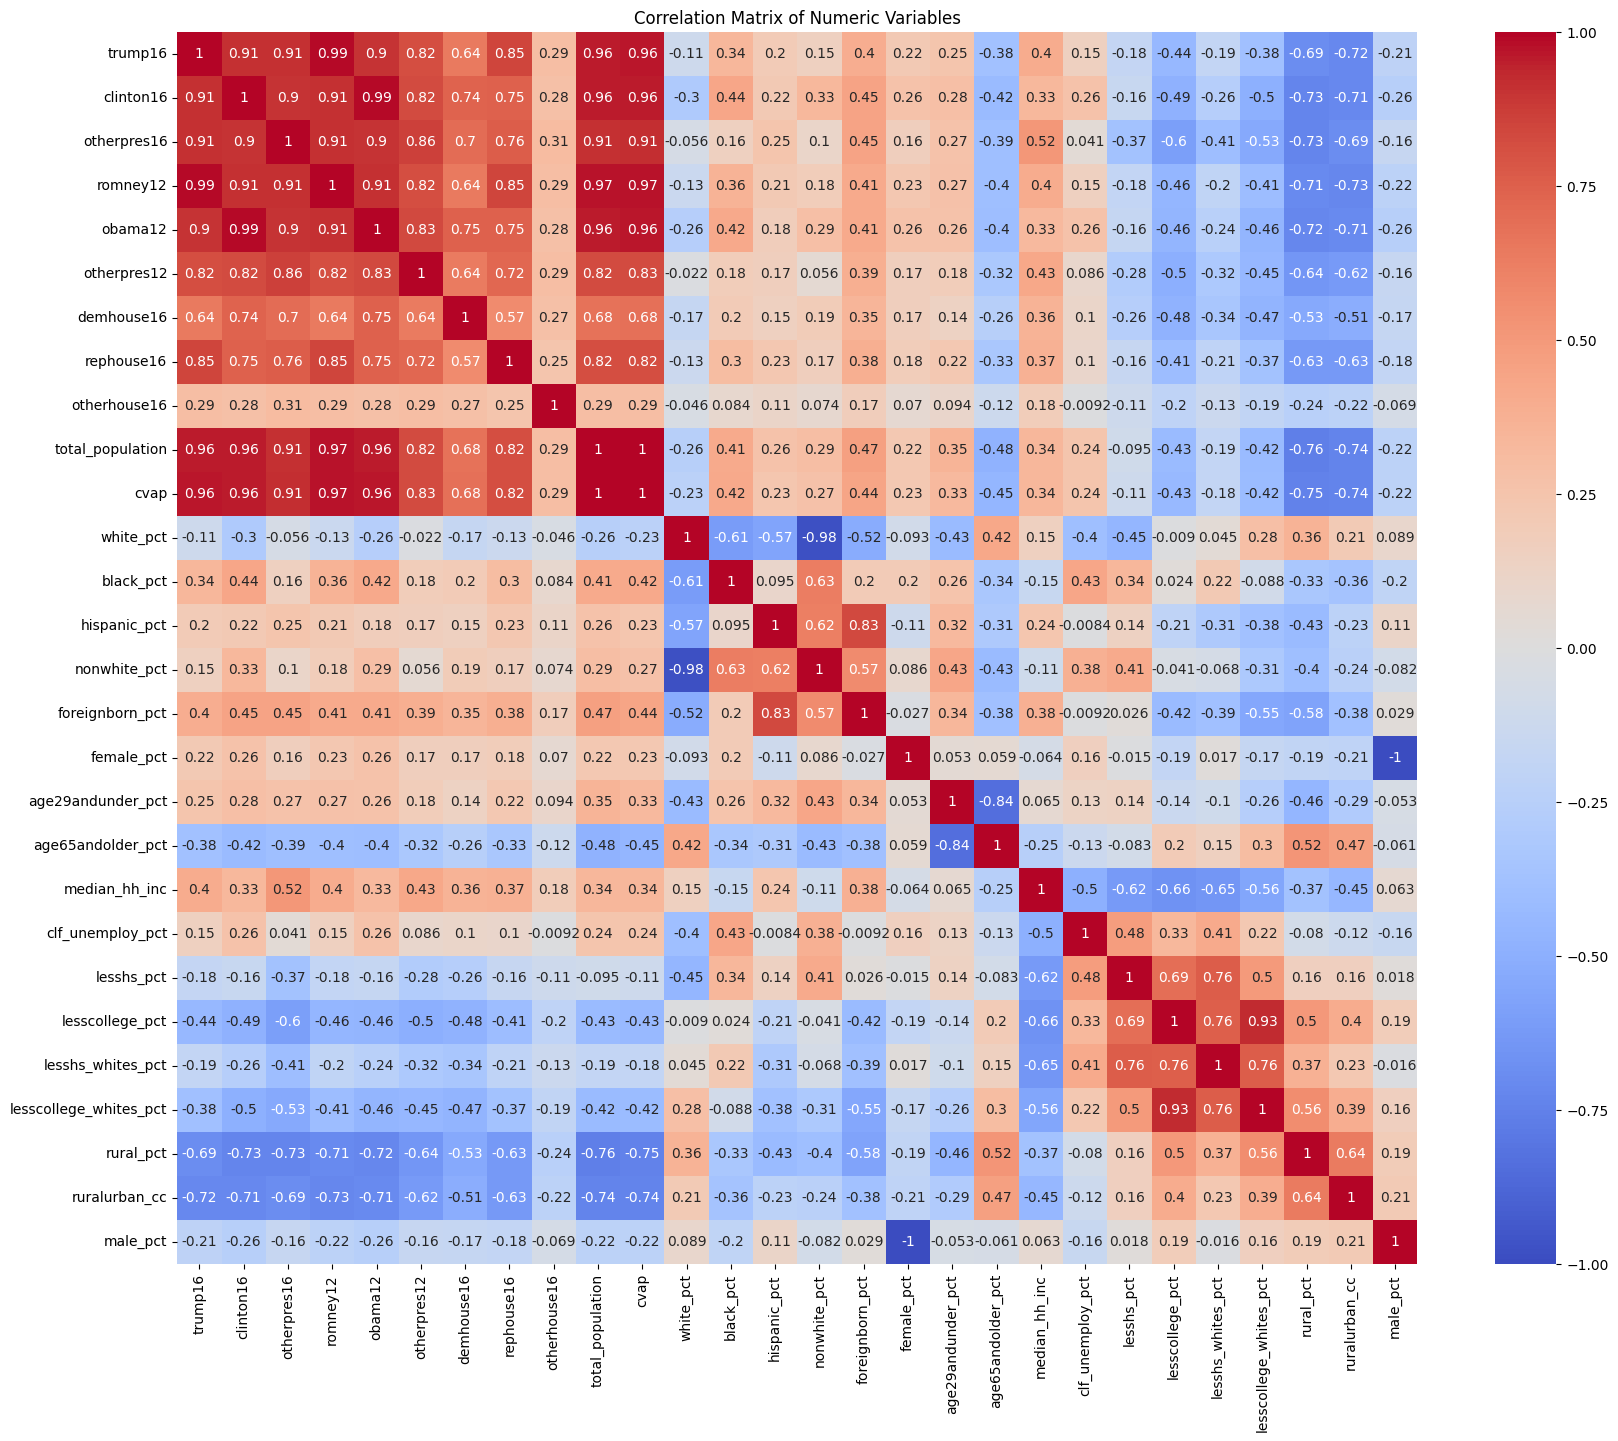

In [ ]:
# prompt: plot correlation matrix between all the numeric variables

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df_cleaned[numeric_columns].corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


In [ ]:


# Step 1: Feature Engineering
df_cleaned['republican_won'] = np.where(df_cleaned['romney12'] > df_cleaned['obama12'], 1, 0)

# Step 2: Data Preparation
# Select relevant features and the target variable
features = [
    'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct',
    'age29andunder_pct', 'age65andolder_pct', 'white_pct', 'black_pct', 'hispanic_pct', 'total_population',
    'foreignborn_pct', 'female_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct', 'rural_pct'
]
target = 'republican_won'


# Split the data into training and testing sets
X = df_cleaned[features]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4, 8, 12, 16],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new random forest classifier with the best hyperparameters
rfc_best = RandomForestClassifier(**best_params)

# Fit the new classifier to the data
rfc_best.fit(X_train, y_train)

# Evaluate the new classifier on the test set
y_pred_best = rfc_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Best parameters: {best_params}")
print(f"Test accuracy with best parameters: {accuracy_best}")


Best parameters: {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test accuracy with best parameters: 0.7158908507223114


In [ ]:




# Make predictions
y_pred = rfc_best.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Identify feature importances
feature_importances = rfc_best.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

accuracy, precision, recall, f1, feature_importance_df


(0.7158908507223114,
 0.7029972752043597,
 0.7914110429447853,
 0.7445887445887446,
                    Feature  Importance
 7                black_pct    0.101889
 6                white_pct    0.094193
 9         total_population    0.073143
 0            median_hh_inc    0.072250
 12       lesshs_whites_pct    0.070898
 1         clf_unemploy_pct    0.069450
 2               lesshs_pct    0.067600
 8             hispanic_pct    0.067502
 13  lesscollege_whites_pct    0.062911
 4        age29andunder_pct    0.058220
 3          lesscollege_pct    0.056238
 5        age65andolder_pct    0.054246
 10         foreignborn_pct    0.053703
 11              female_pct    0.052952
 14               rural_pct    0.044805)

In [ ]:



X = df_cleaned[features]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build and Evaluate the Model
# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions
y_pred = best_knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.7062600321027287
Precision: 0.6876640419947506
Recall: 0.803680981595092
F1 Score: 0.7411598302687412


In [ ]:


X = df_cleaned[features]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build and Evaluate the Model
# Define the SVM classifier
svm_classifier = SVC()

# Define the hyperparameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_svm = grid_search.best_estimator_

# Make predictions
y_pred = best_svm.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7592295345104334
Precision: 0.7514285714285714
Recall: 0.8067484662576687
F1 Score: 0.7781065088757397


In [ ]:


X = df_cleaned[features]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build and Evaluate the Model
# Define the SVM classifier
svm_classifier = SVC()

# Define the hyperparameter grid
param_grid = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_svm = grid_search.best_estimator_

# Make predictions
y_pred = best_svm.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.6869983948635634
Precision: 0.6633416458852868
Recall: 0.8159509202453987
F1 Score: 0.7317744154057771


In [ ]:

# Get feature importances from the best SVM model
feature_importances = best_svm.coef_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances[0]
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)


                   Feature  Importance
8             hispanic_pct    1.137676
6                white_pct    1.062222
2               lesshs_pct    0.647274
13  lesscollege_whites_pct    0.636968
7                black_pct    0.299346
4        age29andunder_pct    0.294678
0            median_hh_inc    0.263712
9         total_population    0.231008
12       lesshs_whites_pct    0.221030
5        age65andolder_pct    0.126625
14               rural_pct    0.037813
11              female_pct   -0.043998
1         clf_unemploy_pct   -0.356126
10         foreignborn_pct   -0.553874
3          lesscollege_pct   -0.677543


In [ ]:

import pandas as pd

# Create a dictionary to store the metrics
metrics = {
    'Algorithm': ['Random Forest', 'KNN', 'SVM'],
    'Accuracy': [0.768, 0.746, 0.773],
    'Precision': [0.764, 0.739, 0.779],
    'Recall': [0.8048, 0.745, 0.830],
    'F1 Score': [0.8043, 0.788, 0.8044]
}

# Create a pandas dataframe
df_metrics = pd.DataFrame(metrics)

# Print the dataframe
print(df_metrics)


       Algorithm  Accuracy  Precision  Recall  F1 Score
0  Random Forest     0.768      0.764  0.8048    0.8043
1            KNN     0.746      0.739  0.7450    0.7880
2            SVM     0.773      0.779  0.8300    0.8044


In [ ]:



# Step 1: Feature Engineering
df_cleaned['trump_won'] = np.where(df_cleaned['trump16'] > df_cleaned['clinton16'], 1, 0)

# Step 2: Data Preparation
# Select relevant features and the target variable
features = [
    'romney12', 'obama12','median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct',
    'age29andunder_pct', 'age65andolder_pct', 'white_pct', 'black_pct', 'hispanic_pct', 'total_population',
    'foreignborn_pct', 'female_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct', 'rural_pct'
]
target = 'trump_won'

X = df_cleaned[features]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build and Evaluate the Model
# Define the SVM classifier
svm_classifier = SVC()

# Define the hyperparameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_svm = grid_search.best_estimator_

# Make predictions
y_pred = best_svm.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9309791332263242
Precision: 0.9346590909090909
Recall: 0.9426934097421203
F1 Score: 0.9386590584878745


# Research Question 6

In [ ]:
# Calculate the percentage of counties that voted Republican in both 2012 and 2016
republican_same = len(merged[(merged['romney12'] > merged['obama12']) & (merged['trump16'] > merged['clinton16'])]) / len(merged) * 100

# Calculate the percentage of counties that voted Democrat in both 2012 and 2016
democrat_same = len(merged[(merged['romney12'] < merged['obama12']) & (merged['trump16'] < merged['clinton16'])]) / len(merged) * 100

# Print the results
print(f"Percentage of counties that voted Republican in both 2012 and 2016: {republican_same:.2f}%")
print(f"Percentage of counties that voted Democrat in both 2012 and 2016: {democrat_same:.2f}%")


Percentage of counties that voted Republican in both 2012 and 2016: 78.19%
Percentage of counties that voted Democrat in both 2012 and 2016: 13.67%


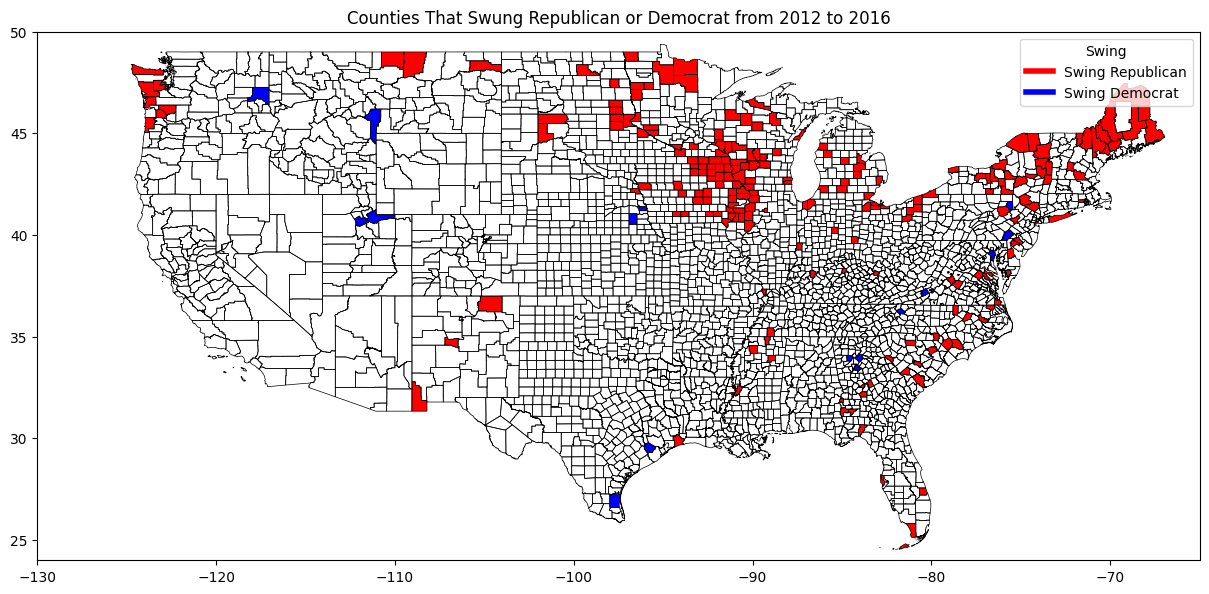

In [ ]:
# Create a figure and axes object
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the counties that swung Republican in red
# Use parentheses to group comparisons for clarity and correct evaluation
merged[ (merged['romney12'] < merged['obama12']) & (merged['trump16'] > merged['clinton16']) ].plot(ax=ax, color='red', label='Swing Republican')

# Plot the counties that swung Democrat in blue
# Use parentheses to group comparisons
merged[ (merged['romney12'] > merged['obama12']) & (merged['trump16'] < merged['clinton16']) ].plot(ax=ax, color='blue', label='Swing Democrat')

# Add the county boundaries
counties.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Set the plot limits to focus on continental US
ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)

# Add a title and legend
plt.title('Counties That Swung Republican or Democrat from 2012 to 2016')
# Create a manual legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='red', lw=4, label='Swing Republican'),
                   Line2D([0], [0], color='blue', lw=4, label='Swing Democrat')]
ax.legend(handles=legend_elements, title='Swing')

# Show the plot
plt.show()